<a href="https://colab.research.google.com/github/urbanis/gbfs-paris-scooters-analysis/blob/main/Entrega_Final_incl_RF_regresor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega del Proyecto Final




## Curso Data Science  - Coder House

Alumnos: Nisleida Morales, Ariel Medina, Rafael Sanchez, Roberto Escobar

El objetivo del proyecto es disminuir el riesgo asociado a la eleccion de apertura de nuevas tiendas de una importante cadena de accesorios para mujeres en Perú.

A través del uso de herramientas de machine learning, se desea aprender de las caracteristicas de la plaza de las tiendas existentes y entrenar un modelo que utilizando la informacion sobre las caracteristicas de la futura tienda, logre predecir si la misma lograra el objetivo de rentablilidad deseado, o no.

Este desafio requerira hallar un algoritmo de alta exactitud y sera decisivo alcanzar una alta especificidad, es decir una alta tasa de identificacion de los casos negativos, para evitar aperturas que no alcance el objetivo de renta exigido por la marca.


En esta entrega final, se realiza un análisis exploratorio de un dataset en el que se describen los datos y las relaciones entre las variables para entender el negocio, luego una analisis de la variable target y finalmente una seleccion del algoritmo para resolver el desafio propuesto.

En una ultima parte del trabajo se incluye una linea de evolucion del trabajo (post coder house), que incluye la posible utilizacion de algoritmos de regresion para la prediccion de ventas de nuevas ubicaciones y asociado a esto, valores maximos negociables de alquiler para la futura ubicacion.


### Tabla de Contenido

* [Data Adquisition](#Data_Adquisition)
* [Revisión de Missing values, dtypes y Data Wrangling](#Revisión_de_Missing_values_dtypes_y_Data_Wrangling)
* [Análisis Univariado](#Análisis_Univariado)
* [Análisis Bivariado](#Análisis_Bivariado)
* [Análisis Multivariado](#Análisis_Multivariado)
* [Seleccion del Algoritmo de Clasificacion: Random Forest, Arboles de Decision, KNN & XGBoost](#Algoritmos_Candidatos:_Algoritmo_de_Clasificacion_Random_Forest_&_KNN)

### Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from seaborn import boxplot
from seaborn import violinplot
from matplotlib.ticker import FormatStrFormatter
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA # Clase para realizar componentes principales
from sklearn.preprocessing import StandardScaler # Estandarizador (transforma las variables en z-scores)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

## Data Adquisition <a class="anchor" id="Data_Adquisition"></a>

A continuación se lee un archivo de datos estructurados en formato Excel provisto por la organización. Este archivo contiene el listado y las características de operación de las tiendas en los meses de octubre y noviembre de 2021.  

In [ ]:
DT = pd.read_excel('C:\Users\rescobarb\Downloads\BBDD-01 Rentabilidad tiendas Peru21 incl competencia duplicado.xlsx',sheet_name = 'PERU')

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
DT

NameError: ignored

In [ ]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Centro de costo                    274 non-null    float64
 1   TIENDA CONTABILIDAD                274 non-null    object 
 2   Tienda                             274 non-null    object 
 3   Plaza                              274 non-null    object 
 4   NSE                                274 non-null    object 
 5   Surtido                            274 non-null    object 
 6   Imagen tienda                      274 non-null    object 
 7   Provincia                          274 non-null    object 
 8   Superficie Exhibicion Tienda 2021  274 non-null    float64
 9   Marca                              274 non-null    object 
 10  Superficie De Exhibicion           274 non-null    object 
 11  Starbucks                          198 non-null    float64

### Revisión de Missing values, dtypes y Data Wrangling <a class="anchor" id="Revisión_de_Missing_values_dtypes_y_Data_Wrangling"></a>

**Summary Dataset info**

In [ ]:
DatasetInfo = 'El dataset provisto tiene ' + str(DT.shape[1]) + ' columnas y ' + str(DT.shape[0]) + ' filas. Se cuenta con ' + str(len(DT.dtypes[DT.dtypes == object])) + ' variables de tipo categóricas. ' + str(len(DT.dtypes[DT.dtypes == int])) + ' variables de tipo entero y ' + str(len(DT.dtypes[DT.dtypes == float])) + ' de tipo decimal.'
print(DatasetInfo)

El dataset provisto tiene 44 columnas y 274 filas. Se cuenta con 10 variables de tipo categóricas. 1 variables de tipo entero y 33 de tipo decimal.


Los tipos de datos por campo son correctos por lo que no se requiere realizar ninguna transformación sobre ellos.

**Missing Values**

In [ ]:
MissingValues = DT.columns[DT.isnull().any()]
'Se encuentran ' + str(len(MissingValues)) + ' columnas con Missing Values. Las cuales son: ' + str(MissingValues.to_list())

"Se encuentran 12 columnas con Missing Values. Las cuales son: ['Starbucks', 'Hamburguesas', 'Patio Comidas', 'Supermercado', 'Departamentales', 'ZARA', 'HM', 'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso']"

La cantidad de missing values es igual para todas las columnas mencionadas.

In [ ]:
'Al analizar uno de los campos con Missing Values se encuentra que el ' + str((((DT.ZARA.isnull().sum())/(DT.shape[0])*100).round(2))) + '% de los datos son faltantes'

'Al analizar uno de los campos con Missing Values se encuentra que el 27.74% de los datos son faltantes'

Todas las columnas encontradas con Missing Values corresponde a campos que indican la cercanía a lugares de interés. No se realiza imputación de datos en ellos ya que afectaría el análisis final.

**Metadata**

In [ ]:
Metadata = pd.read_excel('BBDD-01 Rentabilidad tiendas Peru21 incl competencia duplicado.xlsx',sheet_name = 'Comentarios sobre columnas')
pd.set_option("display.max_colwidth", 1)

In [ ]:
Metadata

,CAMPO,DESCRIPCION
0,Centro de costo,centro de costo de la tienda con fines administrativos
1,TIENDA CONTABILIDAD,Nombre de la tienda para fines administrativos
2,Tienda,Nombre de la tienda
3,Plaza,"Tipo de establecimiento o zona donde se ubica la tienda. Mall significa shopping, via publica es en calles comerciales, departamentales es un modelo de corner o tienda de pocos metros cuadrados dentro de una departamental donde se ubican muchas marcas (son normalmente de falabella o ripley. Este negocio se esta discontinuando por lo que no hace falta su consideracion"
4,NSEmanual,"Nivel Socio Economico, definido por experiencia del equipo de ventas."
5,Surtido,Modelo de abastecimiento de productos. No todos los locales reciben la misma propuesta de productos
6,Imagen tienda,Estilo Arquitectonico
7,Provincia,Provincia donde se ubica
8,Superficie Exhibicion Tienda 2021,Superficie total de la tienda incluye espacio de trastienda y no utilizado en caso de haber
9,Marca,Puede ser Isadora o Todomoda


La metadata nos permite comprender que existen campos que describen cada tienda de forma cualitativa como imagen, marca y ubicación, otro grupo de campos que muestra la cercanía y cantidad de lugares de interés como Starbucks y ZAR y por último, otro grupo de campos que muestra indicadores relacionados a la operación y rentabilidad de las tiendas.

Sin embargo, existen dos campos disponibles en dataset original, que indica quien disponibiliza la BBDD, que no son datos relevantes para un uso en este trabajo (datos exploratorios) por lo que se hace una limpieza y se eliminan del dataset.

In [ ]:
DT = DT.drop(columns = ['Rent combi','Class Rent'], axis=1)
'El dataset provisto ahora tiene ' + str(DT.shape[1]) + ' columnas.'

'El dataset provisto ahora tiene 42 columnas.'

## Análisis Univariado <a class="anchor" id="Análisis_Univariado"></a>

**Pandas Profiling**

Para el análisis univariado se presenta a continuación un reporte de la estadística descriptiva de cada una de las variables generado por el módulo Pandas Profiling.

In [ ]:
#%matplotlib inline
#ProfileReport (DT, minimal = True)

El reporte brinda una comprensión detallada de cada una de las variables, lo cual servirá de consulta para el resto del análisis.

**Se describen los datos cuantitativos**

A continuación se analiza de forma agrupada la estadística descriptiva de cada una de las variables cuantitativas.

In [ ]:
DT.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Centro de costo,274.0,3188.98,60.49,3101.00,3141.00,3179.00,3223.00,3332.00
Superficie Exhibicion Tienda 2021,274.0,25.46,10.83,5.25,16.00,26.70,32.75,48.50
Starbucks,198.0,0.81,0.80,0.00,0.00,1.00,1.00,2.00
Hamburguesas,198.0,1.12,0.83,0.00,0.00,1.00,2.00,3.00
Patio Comidas,198.0,1.13,0.90,0.00,0.00,1.00,2.00,3.00
Supermercado,198.0,1.04,0.45,0.00,1.00,1.00,1.00,2.00
Departamentales,198.0,1.22,0.97,0.00,0.00,1.00,2.00,3.00
ZARA,198.0,0.09,0.29,0.00,0.00,0.00,0.00,1.00
HM,198.0,0.40,0.55,0.00,0.00,0.00,1.00,2.00
Piso,198.0,1.06,0.40,0.00,1.00,1.00,1.00,3.00


**En resumen:**\
    **Superficie Exhibición:** en promedio las tiendas tienen 25,46 m2 \
    **Cercanías:** en promedio la mayoría de las tiendas son cercanas a lugares de comida pero no a tiendas de ropa o cosmética. \
    **Alquileres:** El costo de los alquileres en promedio es de 9.629 soles. Es una variable importante dado que varios indicadores se encuentran relacionados al alquiler. \
    **Ventas:** por otro lado se encuentran indicadores relacionados a las ventas generales, las ventas por unidades y las ventas por ticket. En promedio cada tienda realizó la venta de 8.000 unidades en 3.500 compras. La relación entre la capacidad de venta por unidades y de compras se ve en los indicadores nombrados "vendibilidad". Al analizar la venta por ticket la mayoría de las tiendas venden dos productos al costo de 16 soles. \
    **Cruce Alquileres y ventas:** En promedio el alquiler representa el 18,8% de las ventas. \
    **Rentabilidad:** El promedio de rentabilidad es de 15.866 soles. \
    \
A continuación se realizan los gráficos para algunas variables cuantitativas de interes con el fin de analizar su distribución.

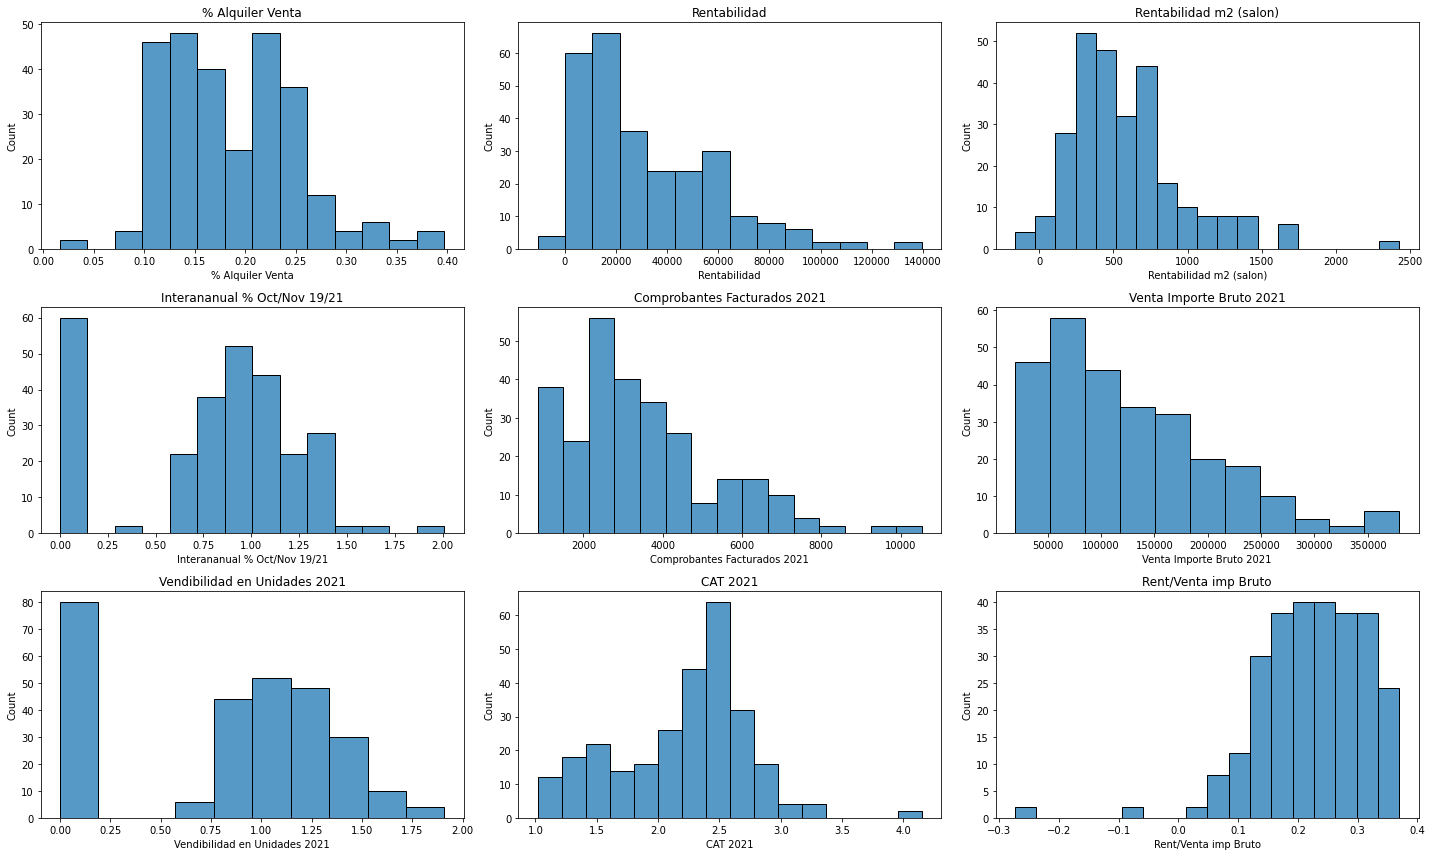

In [ ]:
variables = ['% Alquiler Venta','Rentabilidad','Rentabilidad m2 (salon)', 'Interananual % Oct/Nov 19/21',
            'Comprobantes Facturados 2021','Venta Importe Bruto 2021','Vendibilidad en Unidades 2021',
             'CAT 2021','Rent/Venta imp Bruto']

columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(20,12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(DT[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)

plt.tight_layout()

**Se describen los datos cualitativos**

In [ ]:
filteredColumns = DT.dtypes[DT.dtypes == object]
DT_categorical = pd.DataFrame(DT[filteredColumns.index])
DT_categorical.describe().T

,count,unique,top,freq
TIENDA CONTABILIDAD,274,137,TM PLAZA TRUJILLO,2
Tienda,274,137,TM-TM MALL PLZ TRUJILLO,2
Plaza,274,4,Mall,146
NSE,274,4,C,132
Surtido,274,5,4,70
Imagen tienda,274,5,Nueva,120
Provincia,274,14,Lima,168
Marca,274,2,Todomoda,198
Superficie De Exhibicion,274,4,Mediano,116
Grupo Arrendatario,274,17,RIPLEY,50


Se observa que la mayoría de las tieendas corrresponden a la marca TodoModa, la mayoría de las tiendas están ubicadas en Lima. También se encuentra que la mayoría está ubicada en un Mall.

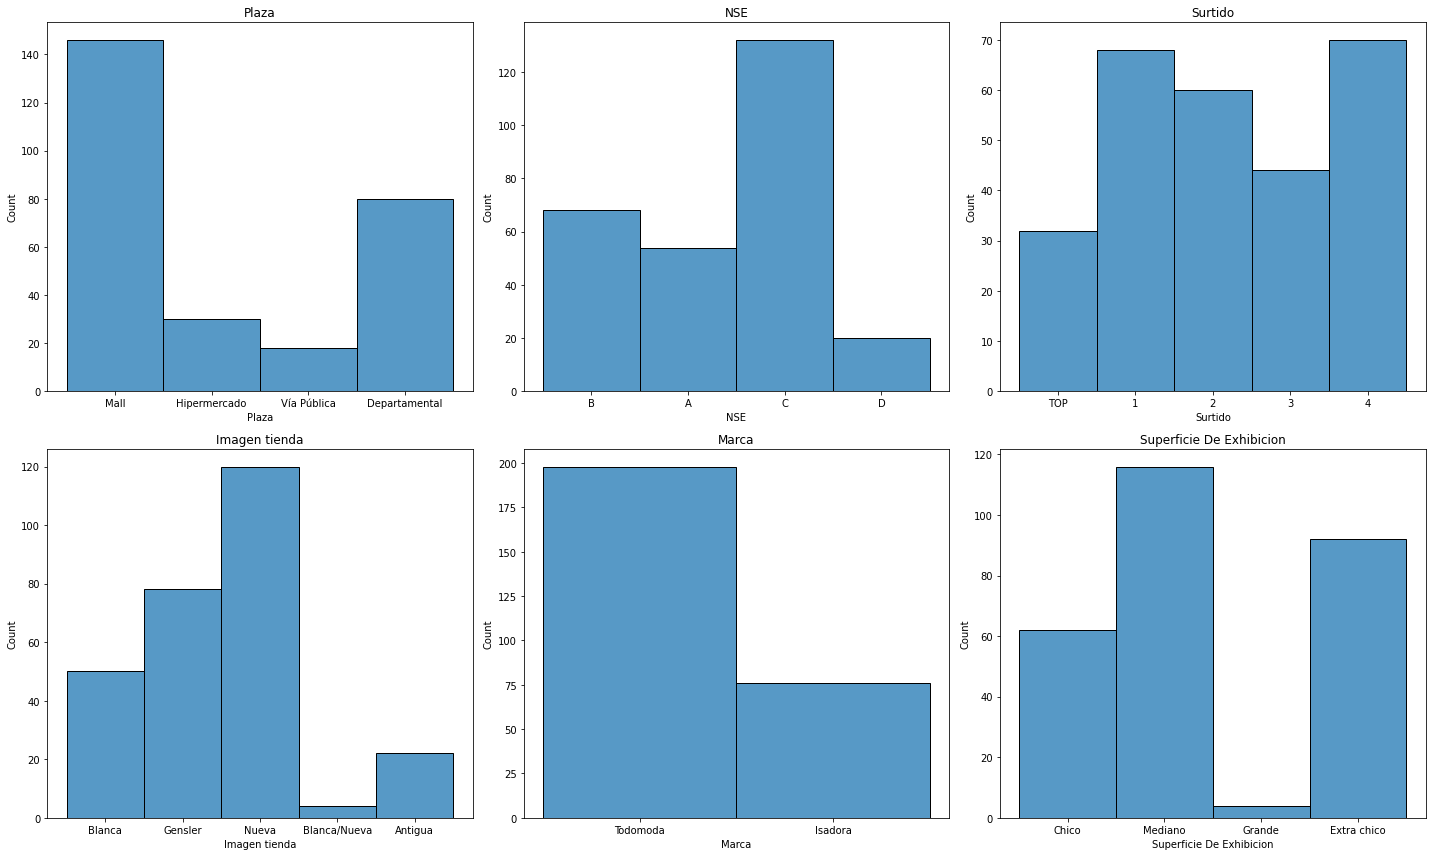

In [ ]:
variables = ['Plaza',  'NSE',  'Surtido', 'Imagen tienda', 'Marca',  'Superficie De Exhibicion']


columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(20,12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(DT[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)

plt.tight_layout()

Como se vió en en la análitica descriptiva, las variables Imagen Tienda, Surtido y Superficie de Exhibición no se encuentran sesgadas por un tipo. La variable NSE si posee sesgo a un nivel socioeconómico de tipo C, el cual preteende ser un nivel medio- bajo.

A continuación, el análisis Univariado se focaliza en la **rentabilidad de las tiendas**

In [ ]:
DT.Rentabilidad.describe().round(2)

count    274.00   
mean     31733.76 
std      26672.30 
min     -10587.81 
25%      11279.68 
50%      22160.50 
75%      48465.04 
max      139528.15
Name: Rentabilidad, dtype: float64

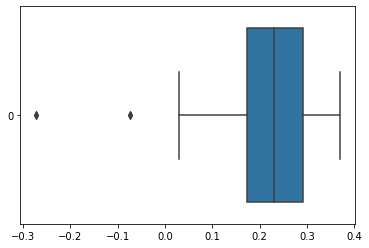

In [ ]:
boxplot(data = DT['Rent/Venta imp Bruto'], orient = "h")

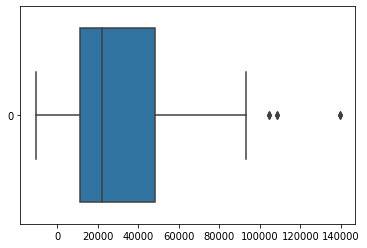

In [ ]:
boxplot(data = DT.Rentabilidad, orient = "h")

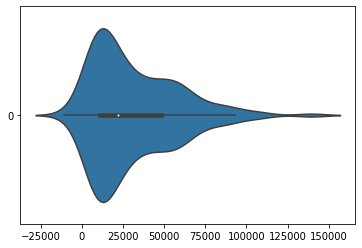

In [ ]:
violinplot(data = DT.Rentabilidad, orient = "h")

Se observa tanto en el gráfico de boxplot como el de violin que existen tiendas con una rentabilidad negativa. También los datos tienen mayor dispersión hacia la derecha, donde hay mayor rentabilidad. En promedio, la rentabilidad es de 31733.76. Se encuentran valores atípicos, por lo que estos serán evaluados con mayor detenimiento más adelante.

## Análisis Bivariado <a class="anchor" id="Análisis_Bivariado"></a>

A través del uso del Análisis Bivariado, se responden preguntas típicas de negocio.

En principio se realizó un análisis de correlación entre todas las variables y se graficó a través de mapa de calor y un pairplot para facilitar la interpretación.

**Matriz de Correlación**

In [ ]:
DTcorr = DT.corr()
DTcorr

,Centro de costo,Superficie Exhibicion Tienda 2021,Starbucks,Hamburguesas,Patio Comidas,Supermercado,Departamentales,ZARA,HM,Piso,...,Venta Importe Bruto 2021,Vendibilidad en Unidades 2021,CAT 2021,Ticket Promedio Total 2021,PPT 2021,prome alquileres,Rent/Venta imp Bruto,Rent/Alq,prome rentabilidad,Cluster
Centro de costo,1.000000,-0.241671,-0.107192,0.054226,0.050019,-0.007252,-0.051893,-0.099701,0.013104,-0.069424,...,-0.254305,-0.511933,-0.406775,-0.274424,0.047975,-0.235369,-0.165436,-0.167400,-0.213913,-0.270582
Superficie Exhibicion Tienda 2021,-0.241671,1.000000,-0.026082,0.098580,0.118644,0.089702,0.179640,-0.118904,-0.140374,-0.207171,...,0.672211,0.655871,0.711956,0.475340,-0.142102,0.540276,0.233046,0.319000,0.556320,0.480168
Starbucks,-0.107192,-0.026082,1.000000,0.292921,0.190401,0.190898,0.523697,0.339403,0.452565,0.354308,...,0.219786,0.035178,-0.108583,-0.033304,0.042004,0.227700,0.043945,-0.084329,0.141854,-0.164040
Hamburguesas,0.054226,0.098580,0.292921,1.000000,0.792477,0.068206,0.216966,0.207294,0.047574,0.038876,...,0.217982,0.097689,-0.119788,-0.250945,-0.164224,0.047724,0.296111,0.191053,0.280915,-0.040071
Patio Comidas,0.050019,0.118644,0.190401,0.792477,1.000000,0.163250,0.199141,0.189165,0.097602,0.062824,...,0.253742,0.031766,-0.079737,-0.250866,-0.184210,0.131955,0.287628,0.183624,0.285450,-0.017044
Supermercado,-0.007252,0.089702,0.190898,0.068206,0.163250,1.000000,0.374862,0.206932,0.097980,0.043014,...,0.167737,0.127764,0.218165,0.162569,0.012256,0.188350,-0.002346,-0.005501,0.084009,-0.075684
Departamentales,-0.051893,0.179640,0.523697,0.216966,0.199141,0.374862,1.000000,0.398536,0.514350,0.043680,...,0.448852,0.132305,0.034407,0.146844,0.114648,0.521788,-0.014542,-0.144204,0.265776,-0.090419
ZARA,-0.099701,-0.118904,0.339403,0.207294,0.189165,0.206932,0.398536,1.000000,0.343279,0.040187,...,0.073646,0.284596,0.035682,-0.050803,-0.061810,0.154846,-0.049578,-0.087382,-0.003426,-0.067191
HM,0.013104,-0.140374,0.452565,0.047574,0.097602,0.097980,0.514350,0.343279,1.000000,0.165544,...,0.164187,-0.058999,-0.170413,0.169733,0.256804,0.283960,-0.152378,-0.244265,0.020589,-0.133336
Piso,-0.069424,-0.207171,0.354308,0.038876,0.062824,0.043014,0.043680,0.040187,0.165544,1.000000,...,0.062173,0.073992,-0.121688,-0.138977,-0.075537,0.115849,0.089720,0.024673,0.046532,-0.051496


**Mapa de Calor**

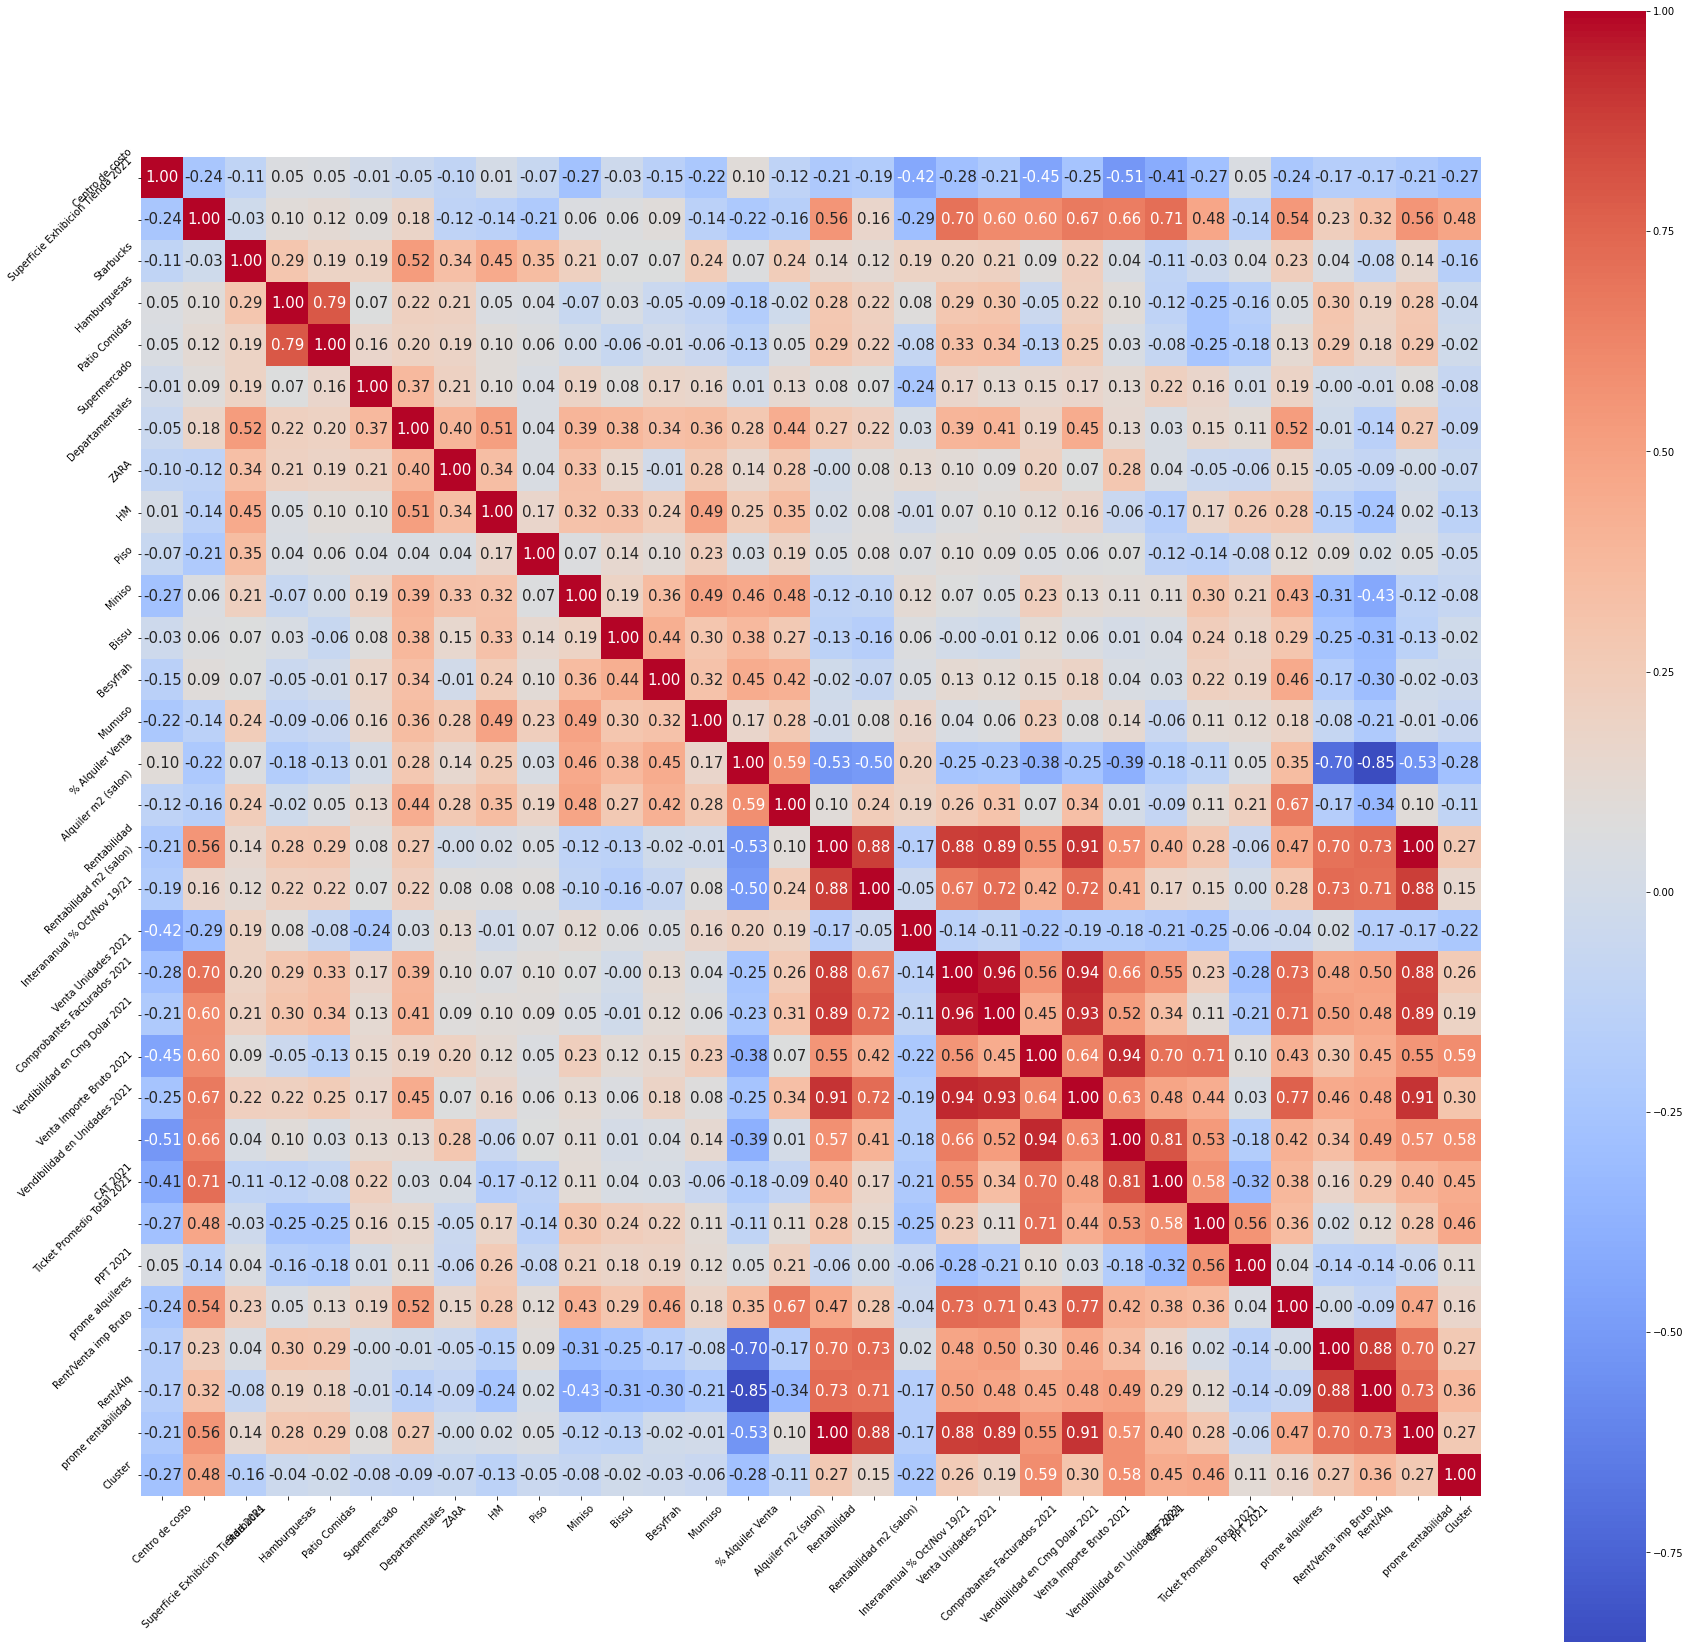

In [ ]:
correlation = DT.corr(method = 'pearson')

plt.figure (figsize =(30,30))

sns.heatmap (correlation,
            cbar = True,
            square = True,
            annot = True,
            fmt = '.2f',
            annot_kws = {'size':15},
            cmap = 'coolwarm')

plt.xticks (rotation = 45)
plt.yticks (rotation = 45)
plt.show()

Es visible que espacios compartidos con competencias, tienden a estar relacionados negativamente con la rentabilidad, tanto porcentual como neta. Las competencias mencionadas son Miniso, Bissu, Besyfrah, Mumuso. Por otra parta las ubicaciones que conviven con espacios de hamburgueserias, patios de comidas o starbucks, tienden a mostrar mejores performance en rentabilidad.

Otras variables como interanualidad, Centro de Costo o piso no parecen tener una fuerte correlación con el resto.

**Pairplot**

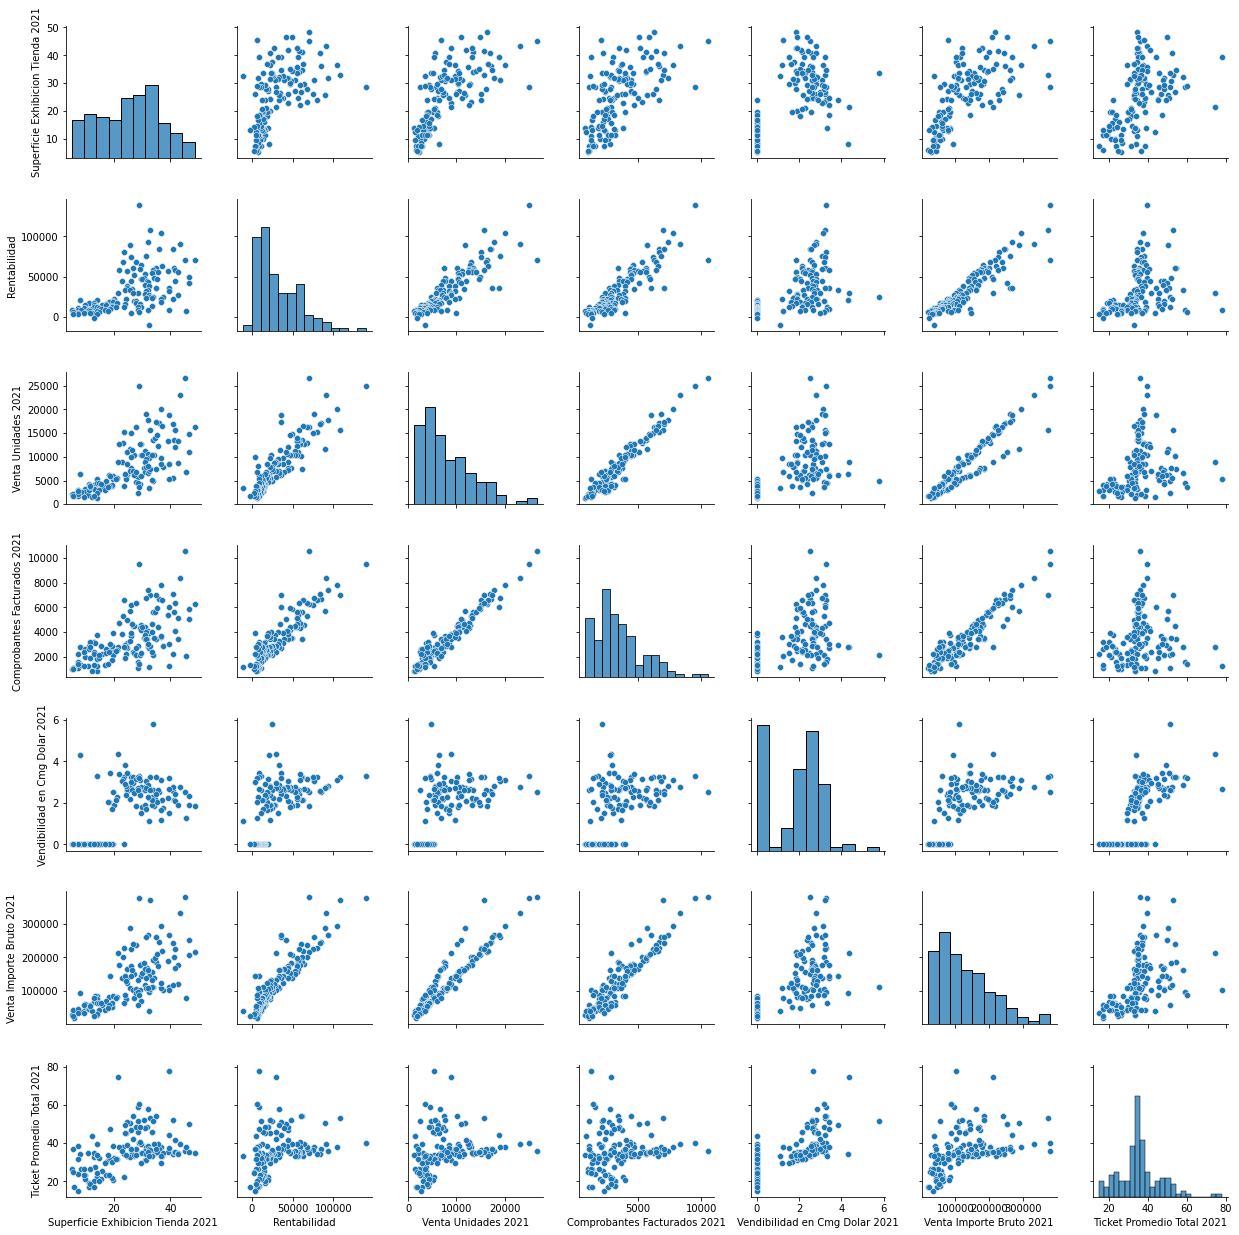

In [ ]:
DTcorr = DT[['Superficie Exhibicion Tienda 2021','Rentabilidad',
       'Venta Unidades 2021','Comprobantes Facturados 2021',
       'Vendibilidad en Cmg Dolar 2021','Venta Importe Bruto 2021','Ticket Promedio Total 2021']]

sns.pairplot(DTcorr)

Se encontró que gran parte de las variables relacionadas a la operación tenían una correlación directa, es decir que al aumentar una de las variables la otra aumenta. Otras variables como superficie de exhibición y vendibilidad parecían tener una correlación nula entre las variables analizadas. Será necesario relacionarlas más adelante con variables categóricas para saber si con estas hay algún tipo de correlación.


A continuación se analizan variables categóricas y cuantitativas y se resuelven algunas preguntas:

**¿La superficie de Exhibición de las tiendas se relaciona con la rentabilidad?**

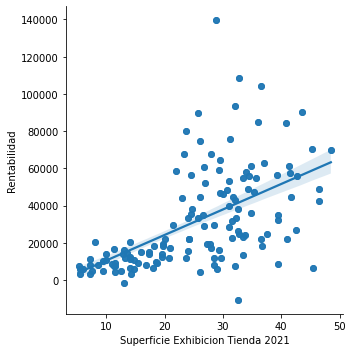

In [ ]:
from seaborn import lmplot
lmplot(x= 'Superficie Exhibicion Tienda 2021', y= 'Rentabilidad', data = DT, fit_reg=True)

Se encuentra que no hay una relación directa entre ambas variables.

**¿Las ventas de unidades es afectada por el emplazamiento del local?**

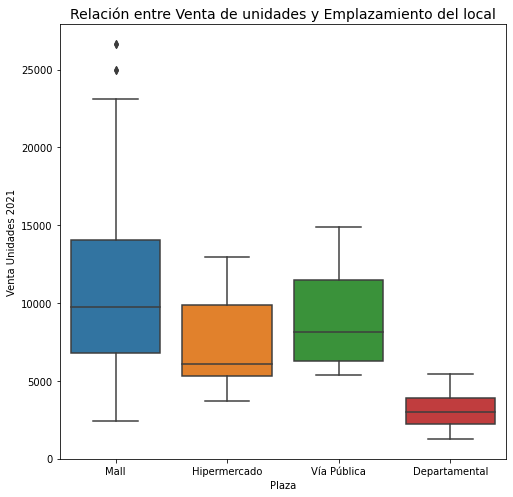

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
sns.boxplot(y = 'Venta Unidades 2021', x = 'Plaza', data = DT)
plt.title('Relación entre Venta de unidades y Emplazamiento del local', fontsize = 14)
plt.show()

Podríamos concluir que, en base a los datos, las tiendas departamentales tienen niveles más bajos de venta en relación al resto. Las ventas en mall tiene un mejor promedio que el resto de los emplazamientos.

**¿Hay relación entre la rentabilidad y la marca de la tienda? ¿cuál de las 2 marcas es más rentable?**

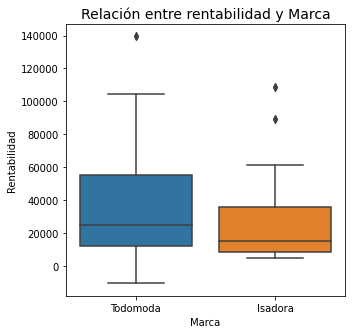

In [ ]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.boxplot(y = 'Rentabilidad', x = 'Marca', data = DT)
plt.title('Relación entre rentabilidad y Marca', fontsize = 14)
plt.show()

Se puede ver que, si bien Todomoda logra como marca rentabilidades mayores a Isadora, es un negocio más arriesgado ya que tambien posee tiendas que tienen rentabilidad negativa, pero pese a esto, sigue teniendo en promedio rentabilidades mayores.

**¿Hay relación entre el nivel socieconómico de la ubicación de la tienda con el promedio de rentabilidad?**

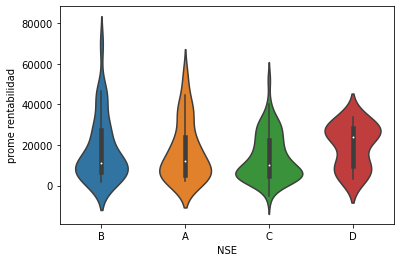

In [ ]:
sns.violinplot(y='prome rentabilidad', x='NSE', data=DT)

Se encontró que para todos los NSE existen tiendas que no dan rentabilidad. Para la mayoria de los NSE la rentabilidad se encuentra alrededor de los 10 mil y 15 mil menos para el nivel D cuya rentabilidad se encuentra superior a los 20 mil.

## Análisis Multivariado <a class="anchor" id="Análisis_Multivariado"></a>

A través de la separación categórica en gráficos se realiza un análisis multivariado, lo cual nos permitira sumar más dimensiones a la comparativa.

A continuación un resumen de los análisis multivariados realizados:

* [Insight agrupación por el tipo de surtido](#Surtido)
* [Insight agrupación por imagen de la tienda](#Imagen)
* [Insight agrupación por NSE](#NSE)
* [Insight agrupación por superficie de exhibición y NSE](#Super)
* [Insight agrupación por el tipo de Plaza](#Plaza)
* [Insight agrupación por NSE, Marca y Plaza](#NSE_MARCA_PLAZA)
* [Insight agrupación por NSE, Marca y Provincia](#PROV)

 **¿Existe algún insight relevante en la correlación si se agrupa por el tipo de surtido?** <a class="anchor" id="Surtido"></a>
\
\
Se analizaron cuales eran las rentabilidades asociadas a la calidad de los productos que se venden en la tienda, siendo las tiendas con surtido de menor calidad las que menos venden y los productos de primera los que parecieran ser más rentables versus la cantidad que se debe vender.

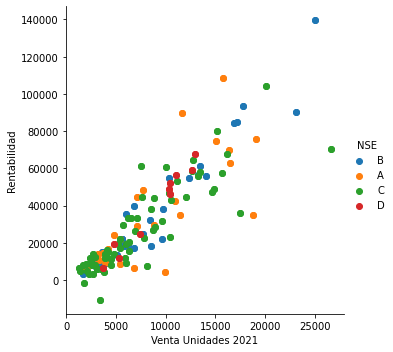

In [ ]:
sns.FacetGrid(DT,hue = 'NSE' , height = 5).map(plt.scatter,'Venta Unidades 2021','Rentabilidad').add_legend();
plt.show()

**¿Existe algún insight relvante en la correlación si se agrupa por imagen de la tienda?** <a class="anchor" id="Imagen"></a>

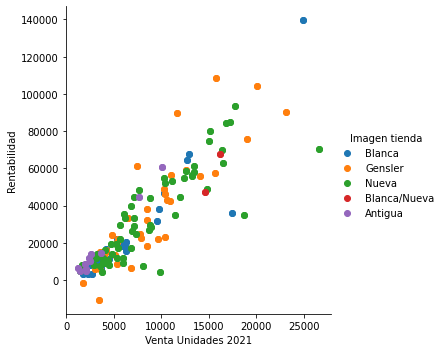

In [ ]:
sns.FacetGrid(DT,hue = 'Imagen tienda' , height = 5).map(plt.scatter,'Venta Unidades 2021','Rentabilidad').add_legend();
plt.show()

Pareciera que la imagen de la tienda no genera distinciones en la rentabilidad.

**¿Existe algún insight relevante en la correlación para todas las variables si se agrupa por NSE?** <a class="anchor" id="NSE"></a>

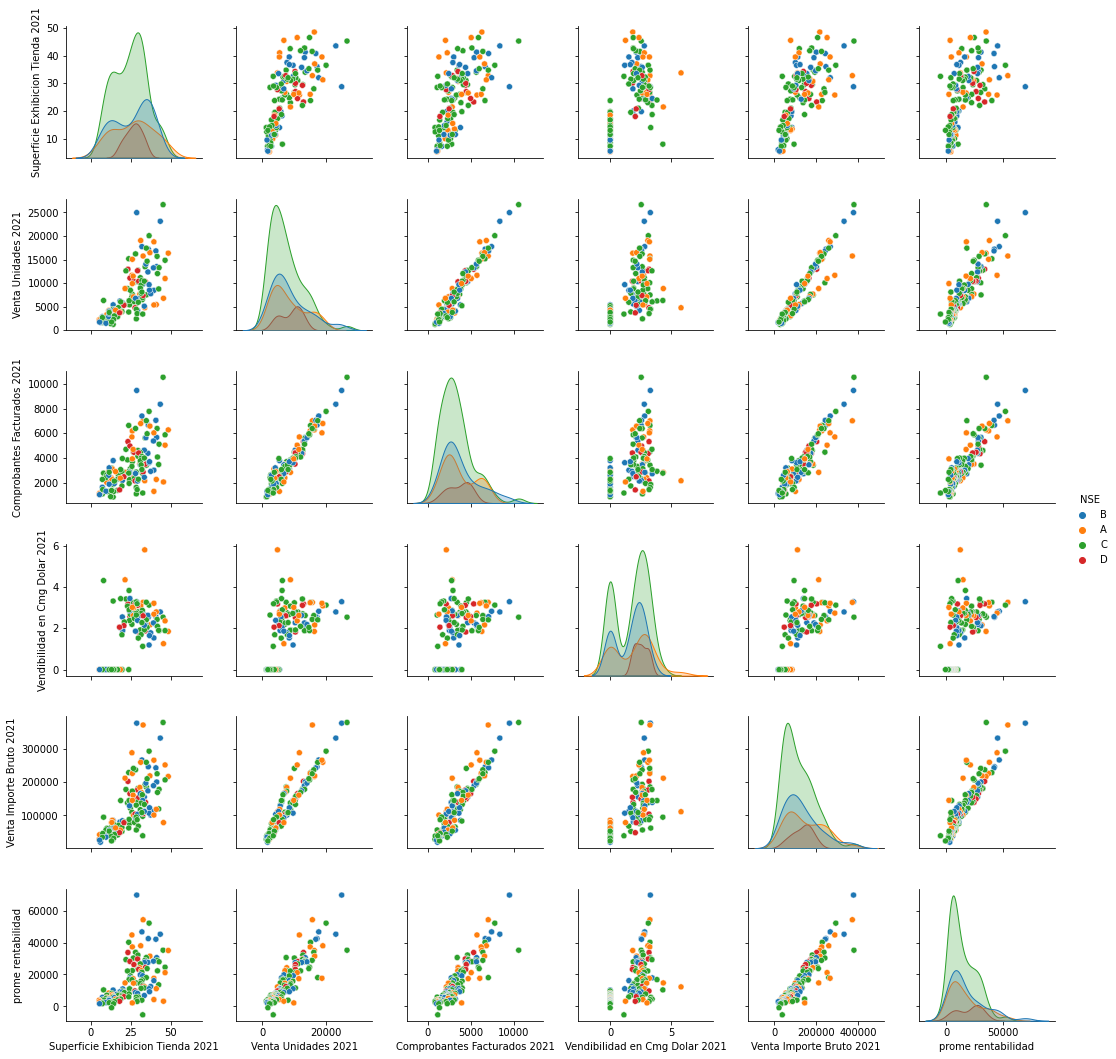

In [ ]:
dfcorr = DT[['Superficie Exhibicion Tienda 2021','Venta Unidades 2021','Comprobantes Facturados 2021','Vendibilidad en Cmg Dolar 2021','Venta Importe Bruto 2021','prome rentabilidad','NSE']]

sns.color_palette("tab10", 8)
sns.pairplot(dfcorr, hue="NSE", palette = 'tab10')

Se observa que todas siguen una distribución similar al menos para las variables cuantitativas analizadas.

**Resulta de interés analizar la superficie de Exhibición de tienda con NSE** <a class="anchor" id="Super"></a>

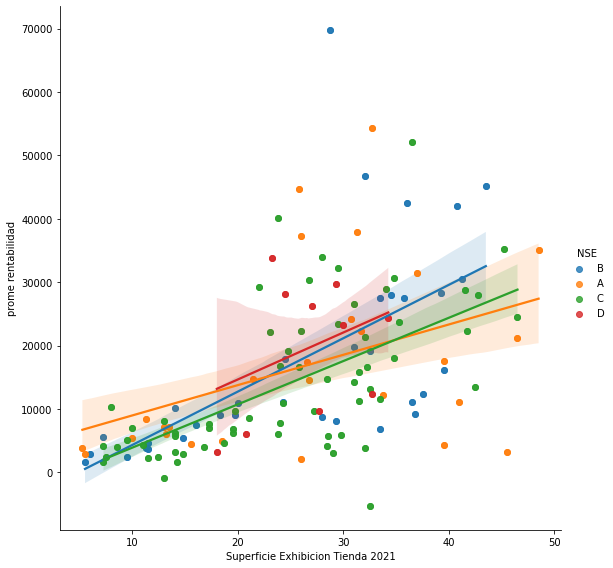

In [ ]:
g = sns.lmplot(data=DT, x='Superficie Exhibicion Tienda 2021', y='prome rentabilidad',hue="NSE", height=8)

g.set_axis_labels('Superficie Exhibicion Tienda 2021', 'prome rentabilidad')

A pesar de la dispersión de los datos, la rentabilidad tiende a responder positivamente al aumento de superficie de exhibición en todos los niveles socioeconómicos a excepción de nivel A. Esto puede asociarse a los altos costos de alquiler exigidos por los centros comerciales en plazas de posicionamiento de marca.

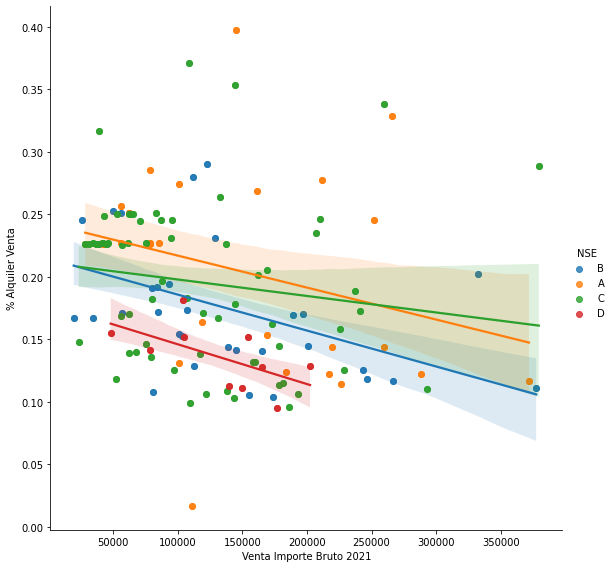

In [ ]:
g = sns.lmplot(data=DT, y='% Alquiler Venta', x='Venta Importe Bruto 2021',hue="NSE", height=8)

g.set_axis_labels('Venta Importe Bruto 2021','% Alquiler Venta')

Efectivamente el costo de alquiler en los ubicaciones en NSE A son mayores y llevan a menores rentabilidades a pesar de mayores ventas. Lo cual verifica el comportamento sugerido en el grafico anterior.

**¿Existe algún insight relvante en la correlación si se agrupa por Plaza?** <a class="anchor" id="Plaza"></a>

Ahora se realiza el pairplot segregado para Plaza

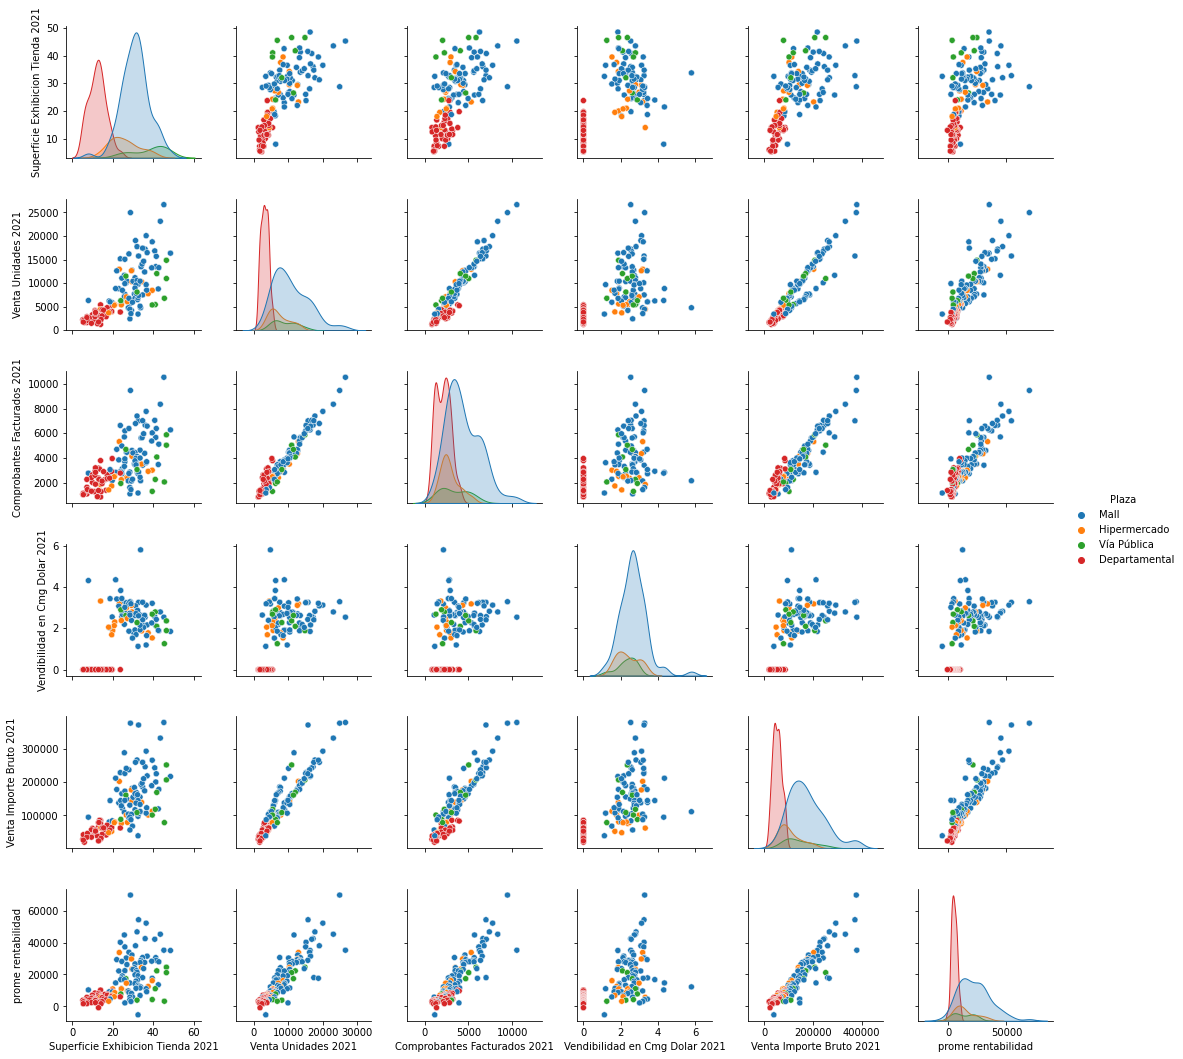

In [ ]:
dfcorr = DT[['Superficie Exhibicion Tienda 2021','Venta Unidades 2021','Comprobantes Facturados 2021','Vendibilidad en Cmg Dolar 2021','Venta Importe Bruto 2021','prome rentabilidad','Plaza']]

sns.color_palette("tab10", 8)
sns.pairplot(dfcorr, hue="Plaza", palette = 'tab10')

Dado que el conjunto de departamentales tiene baja rentabilidad, se ha definido por la empresa discontinuar este canal y no se considerara necesaria su prediccion de rentabilidad. Por tanto se elimina del dataset ya que no será utilizado para el proyecto final.

In [ ]:
DT = DT[(DT['Plaza'] != 'Departamental')]

**Segregando aún más el análisis multivariado por NSE, Marca y Plaza** <a class="anchor" id="NSE_MARCA_PLAZA"></a>

**Isadora**

¿Cómo es la rentabilidad de la marca Isadora según NSE y tipo de Plaza?

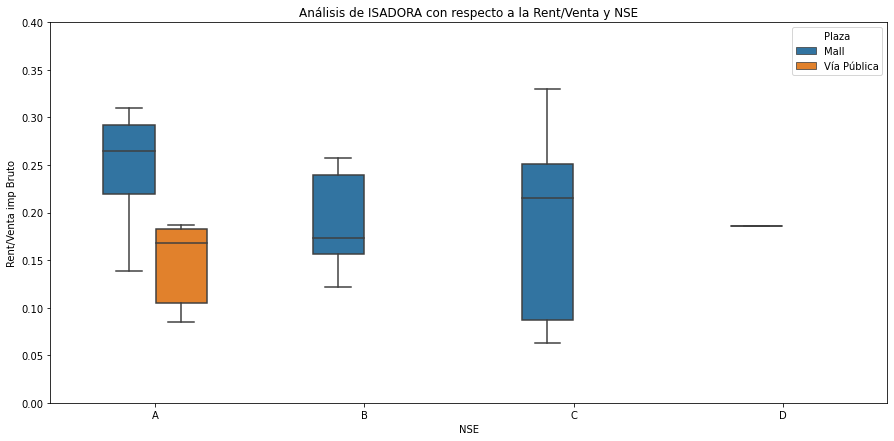

In [ ]:

my_order = DT.groupby(by=["NSE"])["Rent/Venta imp Bruto"].median().iloc[::1].index

fig = plt.figure(figsize=(15,7))
plt.ylim(0,0.4)
sns.boxplot(x='NSE', y='Rent/Venta imp Bruto', data=DT[(DT['Marca'] == 'Isadora')], order=my_order, hue="Plaza", width=0.5, fliersize=6).set_title("Análisis de ISADORA con respecto a la Rent/Venta y NSE")
plt.show()


En Isadora las rentabilidades de las tiendas tienden a caer particularmente en Malls de NSE mas bajos. Vía Pública generan poca rentabilidad más allá de estar ubicados en NSE tipo A.

***Todomoda***

¿Cómo es la rentabilidad de la marca Todo Moda según NSE y tipo de Plaza?

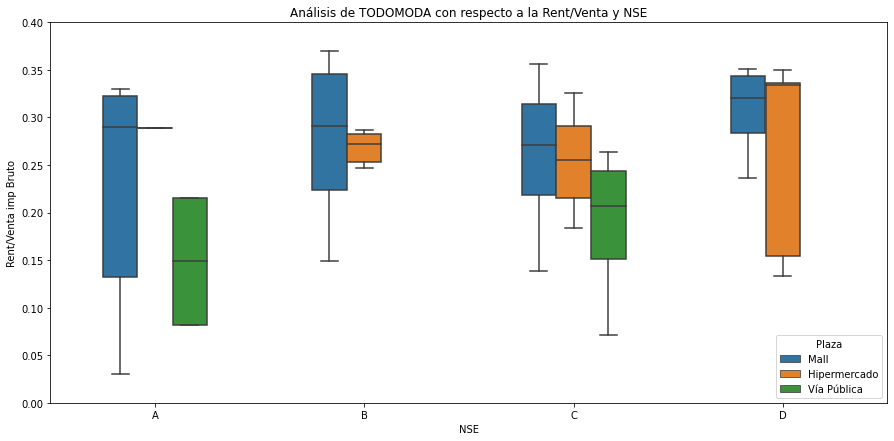

In [ ]:

my_order = DT.groupby(by=['NSE'])["Rent/Venta imp Bruto"].median().iloc[::1].index

fig = plt.figure(figsize=(15,7))
plt.ylim(0,0.4)
sns.boxplot(x='NSE', y='Rent/Venta imp Bruto', data=DT[(DT['Marca'] == 'Todomoda')], order=my_order, hue="Plaza", width=0.5, fliersize=6).set_title("Análisis de TODOMODA con respecto a la Rent/Venta y NSE")
plt.show()

Para las tiendas Todomoda, el NSE tipo A no necesariamente conlleva altos niveles de rentabilidad. En Malls las mejores performances se dan en el NSE tipo B y C.

**Segregando aún más el análisis multivariado por NSE, Marca y Provincia** <a class="anchor" id="PROV"></a>

¿Cómo es la rentabilidad en todas las provincias dado el NSE y la Marca?

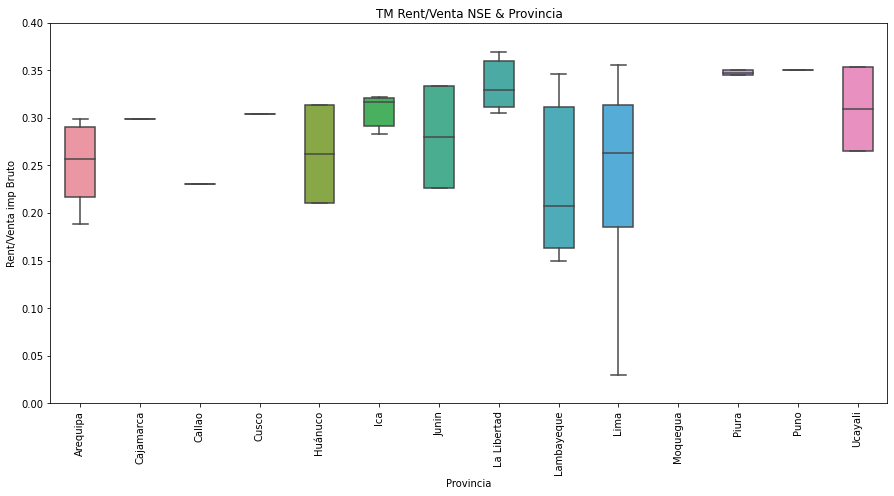

In [ ]:
my_order = DT.groupby(by=["Provincia"])["Rent/Venta imp Bruto"].median().iloc[::1].index

fig = plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylim(0,0.4)
sns.boxplot(x='Provincia', y='Rent/Venta imp Bruto', data=DT[(DT['Marca'] == 'Todomoda') & (DT['Plaza'] == 'Mall')], order=my_order, width=0.5, fliersize=6).set_title("TM Rent/Venta NSE & Provincia")
plt.show()

El interior de Peru performa mas alto que Lima, su capital. Es posible que Lima este mas cerca de saturación. Las zonas del norte son generalmente mas rentables (La Libertad, Piura, Ucayali). En el sur tambien hay buena performance, en Ica, Puno, Cusco, Cajamarca.

**Reducción de dimensionalidad**
\
\
En general del análisis de los pairplots, se afirmó que hay gran correlacion entre algunas variables por lo que se pueden eliminar algunas para evitar multicolinealidad. Por ejemplo: comprobantes con venta en unidades, venta importe bruto y venta en unidades.

In [ ]:
DT = DT.drop(columns = ['Comprobantes Facturados 2021','Venta Unidades 2021'], axis=1)
'El dataset provisto ahora tiene ' + str(DT.shape[1]) + ' columnas.'

'El dataset provisto ahora tiene 40 columnas.'

### PCA

Se utilizan las variables tipo float del dataset

In [ ]:
filteredFloats = DT.dtypes[DT.dtypes == float]
DT_Floats = pd.DataFrame(DT[filteredFloats.index]).drop(columns = DT.columns[DT.isnull().any()], axis=1)

Entrenamiento modelo PCA con escalado de los datos

In [ ]:
std_scale = StandardScaler() # Creamos el estandarizador

In [ ]:
pca = PCA(n_components = 4) # Creación del modelo de PCA con 2 componentes
pca.fit(DT_Floats) # Ajuste y transformación de los datos
X_pca = pca.transform(DT_Floats)

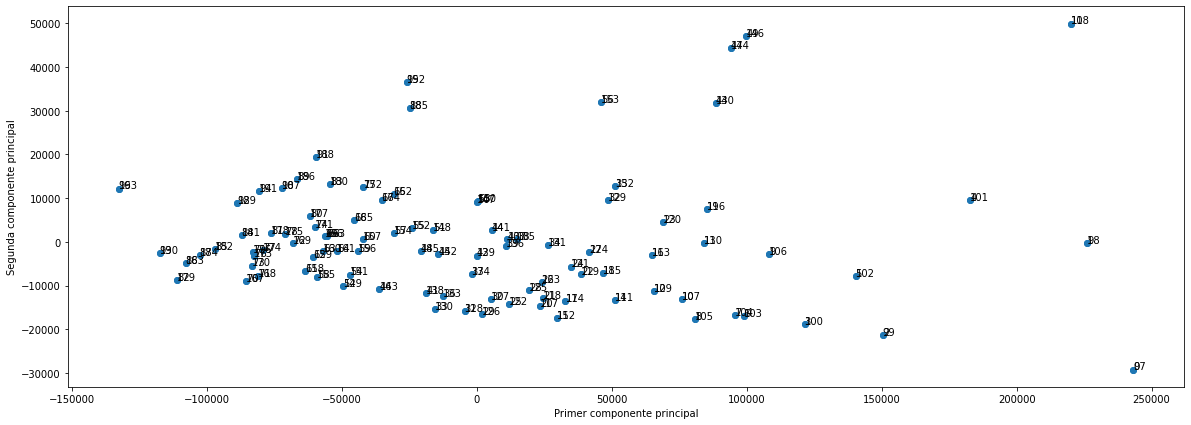

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde
for i in range(DT_Floats.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')
plt.show()

In [ ]:
print(X_pca[11])
print(X_pca[73])

[220236.09611821  49949.65239904  -2559.05899881   -244.85676396]
[-8.34192541e+04 -5.43417555e+03 -3.57882223e+02 -6.13931375e+01]


In [ ]:
# Creación del modelo de PCA
pca = PCA(n_components=20)

# Ajuste y transformación de los datos
pca.fit(DT_Floats)

PCA(n_components=20)

Text(0.5, 0, 'Cantidad de componentes principales')

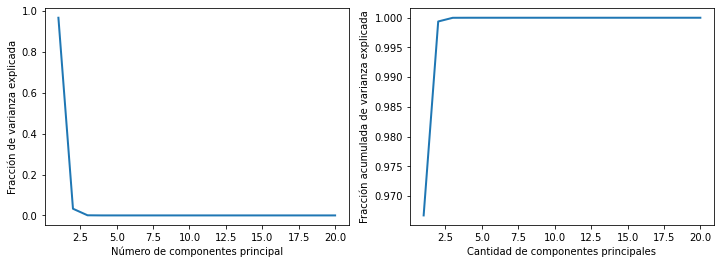

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 2)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componentes principal')

# Calculamos el acumulado con la función cumsum de numpy
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 2)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

Notemos que a pesar que nuestros datos viven originalmente en un espacio de 39 features con solo 2 componentes principales alcanzamos alrededor del 90% de la información, lo cual implica una reducción dimensional bastante importante sin una pérdida tan significativa de la información.

# Selección del Algoritmo de Clasificación: Random Forest, Arboles de Decisión, KNN & XGBoost

#### Antes de analizar las diferentes variables, excluiremos el tipo de negocio "departamentales" dado que este negocio se ha decidido descontinuar y no se utilizara en el modelo de prediccion del proyecto final.

In [ ]:
data = DT[(DT['Plaza'] != 'Departamental')]
tiendas = np.unique(data['Tienda'].to_numpy())
data.shape

(194, 40)

In [ ]:

data.count()

Centro de costo                      194
TIENDA CONTABILIDAD                  194
Tienda                               194
Plaza                                194
NSE                                  194
Surtido                              194
Imagen tienda                        194
Provincia                            194
Superficie Exhibicion Tienda 2021    194
Marca                                194
Superficie De Exhibicion             194
Starbucks                            194
Hamburguesas                         194
Patio Comidas                        194
Supermercado                         194
Departamentales                      194
ZARA                                 194
HM                                   194
Piso                                 194
Miniso                               194
Bissu                                194
Besyfrah                             194
Mumuso                               194
Grupo Arrendatario                   194
% Alquiler Venta

#### Ahora incluiremos una nueva columna para transformar la variable rentabilidad sobre ventas en una clasificacion categorica.

In [ ]:
data['Clase Rentabilidad'] = np.where(data['Rent/Venta imp Bruto']>=0.25, 'Alta', 'Baja')
data['Clasif Rentabilidad'] = np.where(data['Rent/Venta imp Bruto']>=0.25, '1', '0')
data['Clasif Rentabilidad'] = data['Clasif Rentabilidad'].astype(int)
# la separacion se definio en 25% para lograr un balanceo y conseguir una similitud en la cantidad de casos de cada clase. Esto se visualiza en el boxplot de la linea 18.

In [ ]:
data.columns

Index(['Centro de costo', 'TIENDA CONTABILIDAD', 'Tienda', 'Plaza', 'NSE',
       'Surtido', 'Imagen tienda', 'Provincia',
       'Superficie Exhibicion Tienda 2021', 'Marca',
       'Superficie De Exhibicion', 'Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado', 'Departamentales', 'ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso', 'Grupo Arrendatario',
       '% Alquiler Venta', 'Alquiler m2 (salon)', 'Rentabilidad',
       'Rentabilidad m2 (salon)', 'Interananual % Oct/Nov 19/21',
       'Vendibilidad en Cmg Dolar 2021', 'Venta Importe Bruto 2021',
       'Vendibilidad en Unidades 2021', 'CAT 2021',
       'Ticket Promedio Total 2021', 'PPT 2021', 'prome alquileres',
       'Rent/Venta imp Bruto', 'Rent/Alq', 'prome rentabilidad', 'Cluster',
       'Clase Rentabilidad', 'Clasif Rentabilidad'],
      dtype='object')

### Ahora incluiremos un análisis exploratorio de variable target, "Clasif Rentabilidad' definida recientemente como binaria

In [ ]:
data_cf = data[['Marca', 'NSE', 'Imagen tienda', 'Provincia','Superficie Exhibicion Tienda 2021','Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado', 'Departamentales', 'ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso', 'Grupo Arrendatario','Plaza','Clasif Rentabilidad']]


In [ ]:
data_cf[['Superficie Exhibicion Tienda 2021','Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado', 'Departamentales', 'ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso', 'Clasif Rentabilidad']] = data_cf[['Superficie Exhibicion Tienda 2021','Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado', 'Departamentales', 'ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso', 'Clasif Rentabilidad']].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_cf.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Superficie Exhibicion Tienda 2021,194.0,30.46,7.57,8.0,26.0,31.0,35.0,48.0
Starbucks,194.0,0.78,0.79,0.0,0.0,1.0,1.0,2.0
Hamburguesas,194.0,1.11,0.84,0.0,0.0,1.0,2.0,3.0
Patio Comidas,194.0,1.12,0.90,0.0,0.0,1.0,2.0,3.0
Supermercado,194.0,1.04,0.45,0.0,1.0,1.0,1.0,2.0
Departamentales,194.0,1.22,0.98,0.0,0.0,1.0,2.0,3.0
ZARA,194.0,0.09,0.29,0.0,0.0,0.0,0.0,1.0
HM,194.0,0.39,0.55,0.0,0.0,0.0,1.0,2.0
Piso,194.0,1.05,0.39,0.0,1.0,1.0,1.0,3.0
Miniso,194.0,0.31,0.46,0.0,0.0,0.0,1.0,1.0


In [ ]:
data_cf.groupby(['Clasif Rentabilidad']).count().round()

,Marca,NSE,Imagen tienda,Provincia,Superficie Exhibicion Tienda 2021,Starbucks,Hamburguesas,Patio Comidas,Supermercado,Departamentales,ZARA,HM,Piso,Miniso,Bissu,Besyfrah,Mumuso,Grupo Arrendatario,Plaza
Clasif Rentabilidad,,,,,,,,,,,,,,,,,,,
0,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


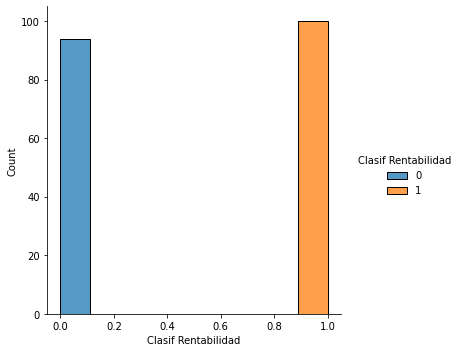

In [ ]:
sns.displot(data_cf, x='Clasif Rentabilidad', hue='Clasif Rentabilidad', multiple="stack")


En este grafico es posible evidenciar que la muestra de datos a analizar se encuentra balanceada en su variable target a predecir.

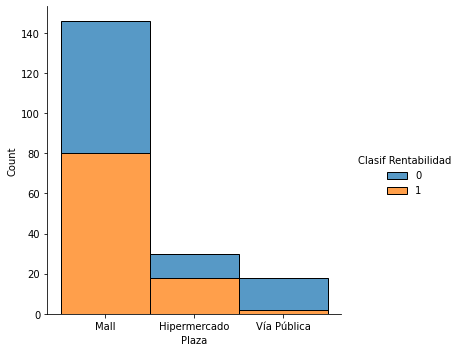

In [ ]:
sns.displot(data_cf, x='Plaza', hue='Clasif Rentabilidad', multiple="stack")


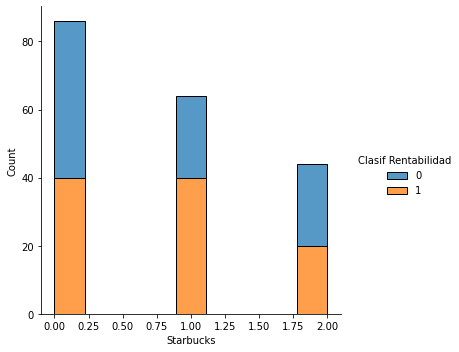

In [ ]:
sns.displot(data_cf, x='Starbucks', hue='Clasif Rentabilidad', multiple="stack")


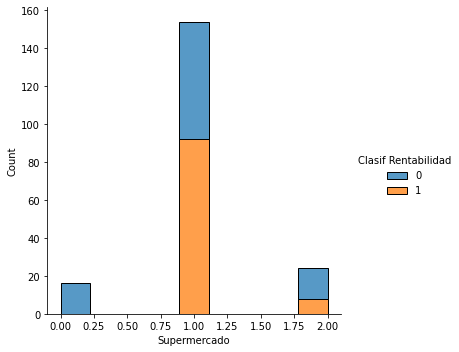

In [ ]:
sns.displot(data_cf, x='Supermercado', hue='Clasif Rentabilidad', multiple="stack")


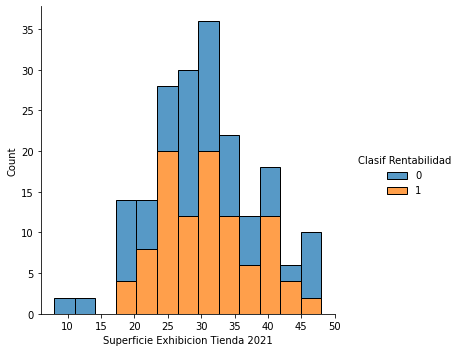

In [ ]:
sns.displot(data_cf, x='Superficie Exhibicion Tienda 2021', hue='Clasif Rentabilidad', multiple="stack")

Estos comportamientos de distintas variables, diferenciadas en base a su variable target, muestran distribuciones balanceadas en el dataset de entrenamiento.

In [ ]:
data_cf_corr = data_cf.corr(method = 'pearson')

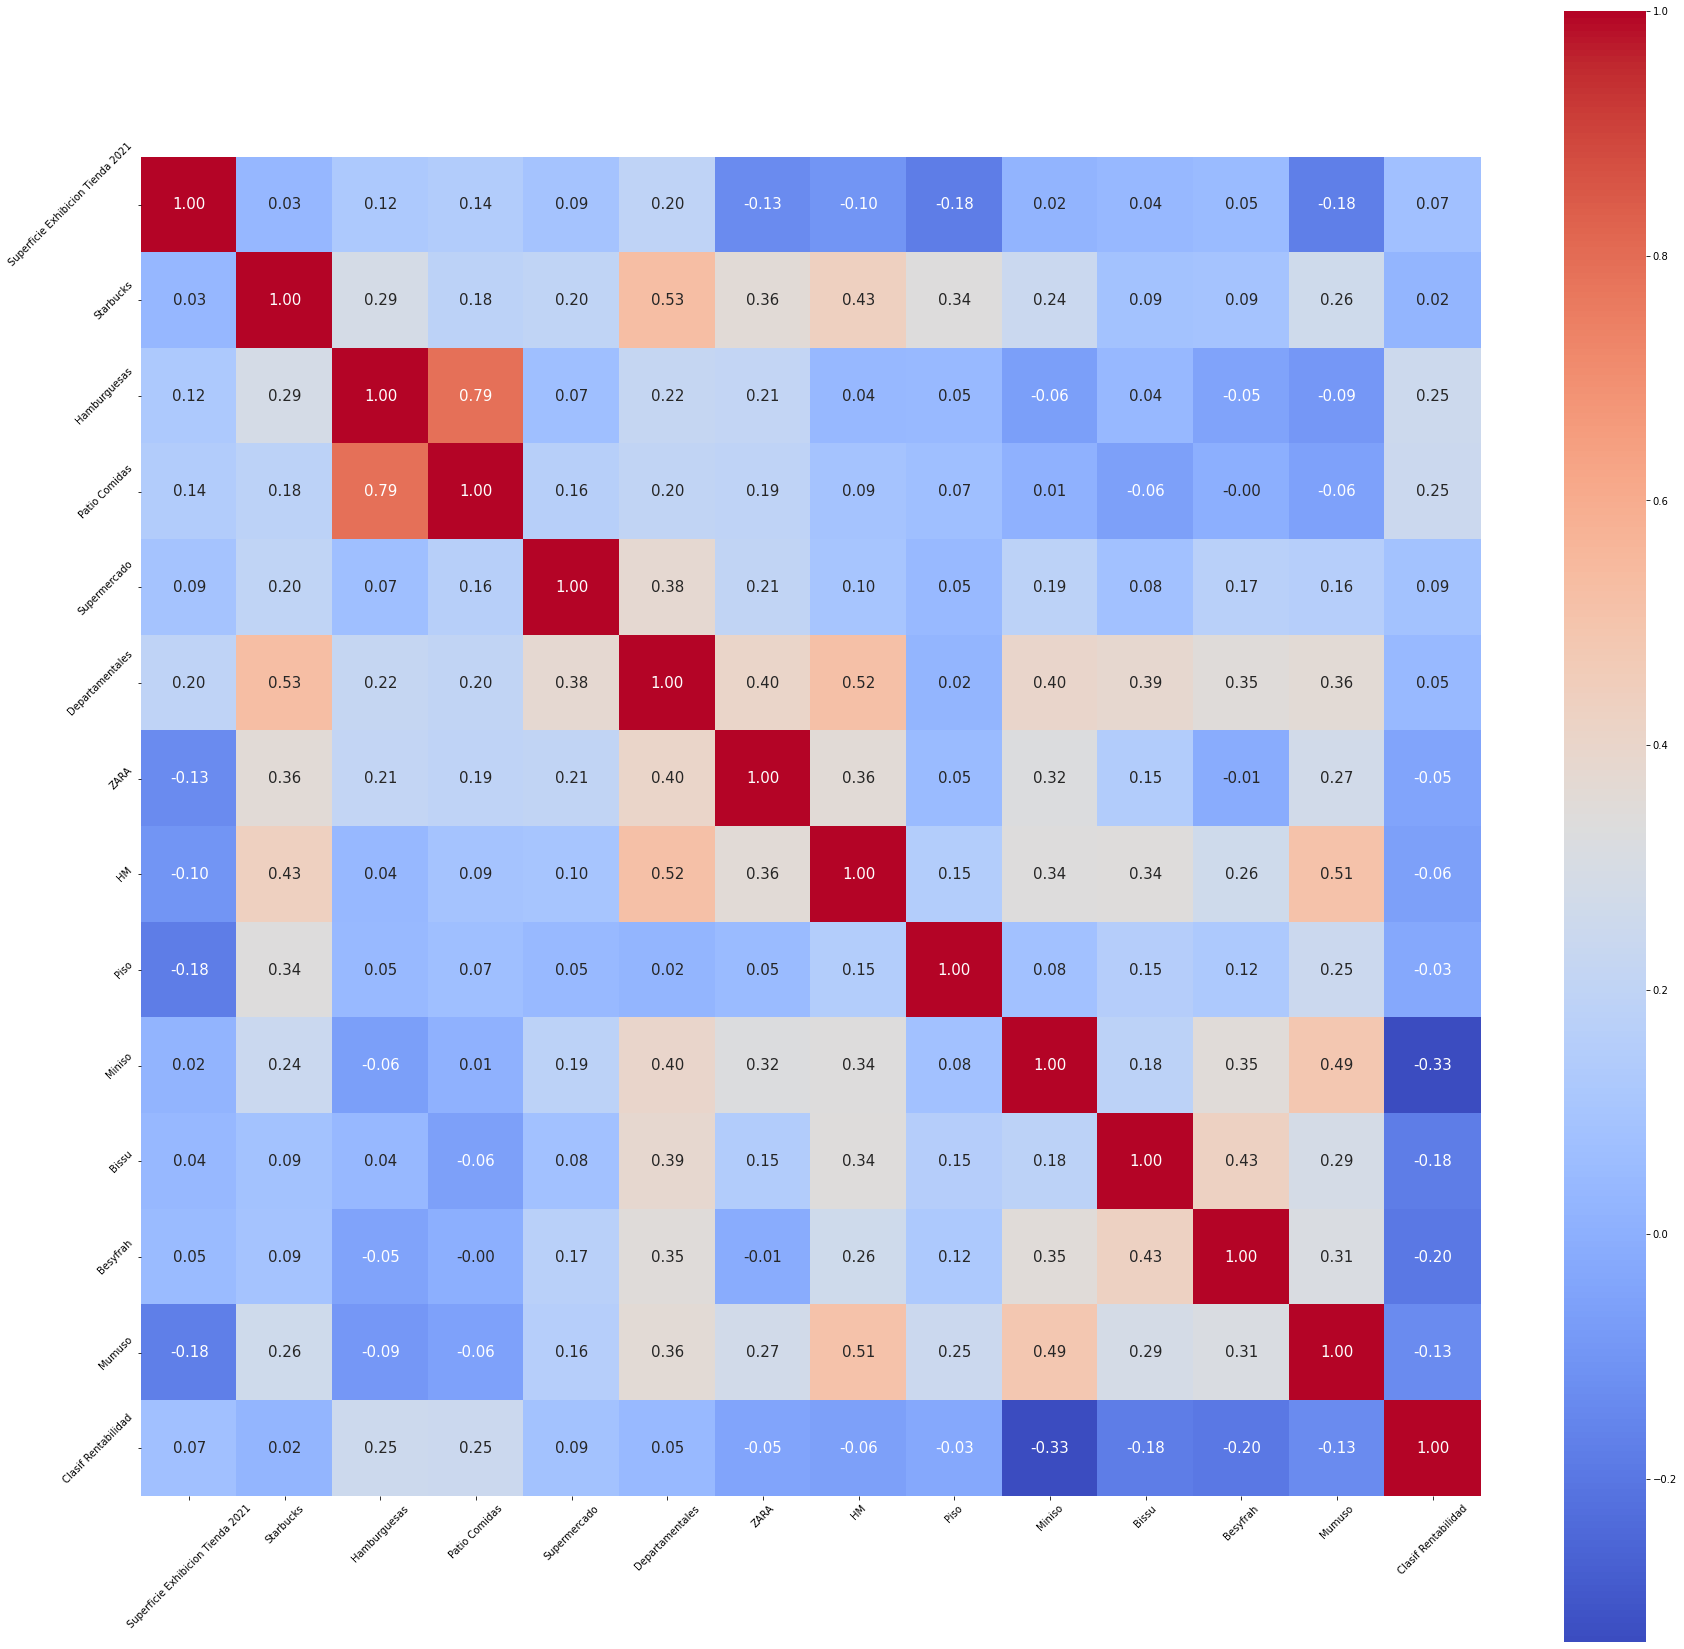

In [ ]:
plt.figure (figsize =(30,30))

sns.heatmap (data_cf_corr,
            cbar = True,
            square = True,
            annot = True,
            fmt = '.2f',
            annot_kws = {'size':15},
            cmap = 'coolwarm')

plt.xticks (rotation = 45)
plt.yticks (rotation = 45)
plt.show()

Es posible concluir del análisis exploratorio de la variable categorica target (clasif rentabilidad), y del estudio de correlaciones, que la muestra se encuentra apropiadamente balanceada. Adicionalemente es poca la correlación entre sus variables predictoras a excepción del comportamiento negativo de correlación en ubicaciones donde se presentan marcas que compiten en el segmento.

# Machine Learning - Modelo de Clasificación

Definimos primero, las columnas categoricas

In [ ]:
data_cf[['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado','ZARA', 'HM', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso', 'Piso']] = data_cf[['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','Starbucks', 'Hamburguesas',
       'Patio Comidas', 'Supermercado','ZARA', 'HM', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso','Piso']].astype('category')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Elegimos los datos que queremos analizar


In [ ]:
# Definimos todas las variables como variables independientes.
Xini = data_cf[['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso','Superficie Exhibicion Tienda 2021']]

# Definimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_cf['Clasif Rentabilidad']

In [ ]:
X = pd.get_dummies(Xini, drop_first=True, prefix = ['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso'], columns= ['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso'])
X
#se utiliza dropfirst=True para evitar columnas dummies que generen multicolinealidad

,Superficie Exhibicion Tienda 2021,Marca_Todomoda,Plaza_Mall,Plaza_Vía Pública,NSE_B,NSE_C,NSE_D,Imagen tienda_Blanca,Imagen tienda_Blanca/Nueva,Imagen tienda_Gensler,...,ZARA_1,HM_1,HM_2,Piso_1,Piso_2,Piso_3,Miniso_1,Bissu_1,Besyfrah_1,Mumuso_1
0,28,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,32,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,36,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,32,1,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,43,1,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,45,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
258,18,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
260,29,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,1,1,1
268,26,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,0


Separaremos los datos de entrenamiento y evaluacion (train y test)

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train  #al tener pocos datos utilizaremos un test que no sea tan pequeno y lo definimos en 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Importamos librerias
import scipy as sp
from sklearn.metrics import confusion_matrix, accuracy_score


## Resolución: Modelo de Clasificación, Random Forest

In [ ]:
#Carga de las librerías
import urllib.request
from sklearn.ensemble import RandomForestClassifier

Creamos un random forest

In [ ]:
RFmodel = RandomForestClassifier(random_state=11, n_estimators=20,
                               class_weight="balanced", max_features="log2")
RFmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=20, random_state=11)

In [ ]:
y_test_pred_RF = RFmodel.predict(X_test) #Prediccion en Test
y_train_pred_RF = RFmodel.predict(X_train) #Prediccion en Train

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred_RF)

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred_RF)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy.round(3))


% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.932


Matriz de Confusión: Random Forest

In [ ]:
cm_RF = confusion_matrix(y_test, y_test_pred_RF)

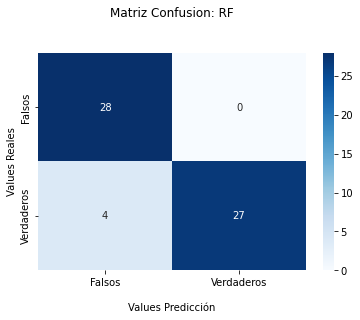

In [ ]:
ax = sns.heatmap(cm_RF, annot=True, cmap='Blues')

ax.set_title('Matriz Confusion: RF\n\n');
ax.set_xlabel('\nValues Predicción')
ax.set_ylabel('Values Reales');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

## Display the visualization of the Confusion Matrix.
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


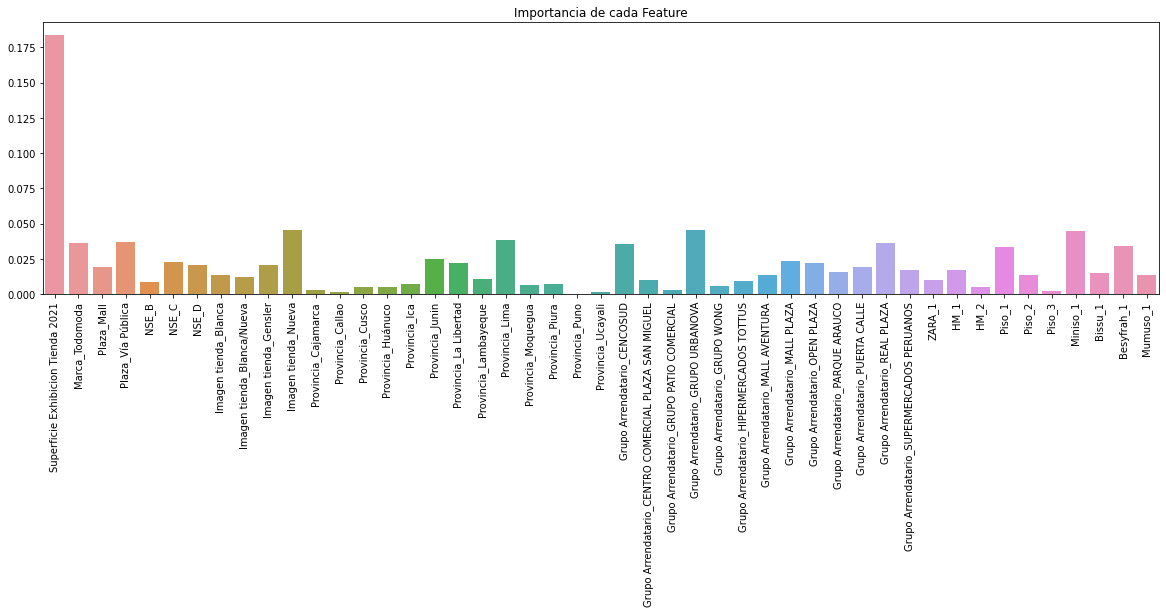

In [ ]:
import seaborn as sns
%matplotlib inline

importances = RFmodel.feature_importances_
columns = X.columns
plt.figure(figsize=(20,5))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
#plt.ylim(0,0.4)
plt.xticks(rotation=90)
plt.show()

###Grid Search para Random Forest

In [ ]:
#Importamos librerias

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


In [ ]:
#Definicion de Hyperparámetros para Random Forest
param_grid = {
    "n_estimators":[100,200,500], #agregamos un estimador alto para verificar si mejora
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}
#Utilizamos la grilla definida anteriormente...
model_CV_RF = GridSearchCV(RFmodel, param_grid=param_grid, cv=5)

In [ ]:
#Entrenamos nuestro modelo de RF con la grilla ya definida y CV con tamaño de Fold=5
model_CV_RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features='log2',
                                              n_estimators=20,
                                              random_state=11),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 500]})

In [ ]:
print("Mejores parametros: "+str(model_CV_RF.best_params_))
print("Mejor Score: "+str(model_CV_RF.best_score_.round(3))+'\n')

Mejores parametros: {'max_depth': 50, 'max_features': 10, 'n_estimators': 100}
Mejor Score: 0.815



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model_CV_RF.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.161327,0.013096,0.017728,0.001906,10,6,100,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 100}",0.925926,0.777778,0.777778,0.777778,0.666667,0.785185,0.082485,33
1,0.317887,0.013027,0.031534,0.002289,10,6,200,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 200}",0.925926,0.777778,0.814815,0.777778,0.703704,0.800000,0.072577,8
2,0.749110,0.012212,0.076947,0.009756,10,6,500,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 500}",0.925926,0.740741,0.851852,0.777778,0.703704,0.800000,0.079780,11
3,0.156798,0.010622,0.017248,0.001764,10,8,100,"{'max_depth': 10, 'max_features': 8, 'n_estimators': 100}",0.925926,0.740741,0.814815,0.740741,0.703704,0.785185,0.079089,28
4,0.308776,0.007441,0.031128,0.001454,10,8,200,"{'max_depth': 10, 'max_features': 8, 'n_estimators': 200}",0.925926,0.740741,0.777778,0.740741,0.703704,0.777778,0.077690,46


Ahora sí ya estamos en condición de realizar nuestras predicciones


In [ ]:
#realizaremos nuestras predicciones

y_test_pred_CV_RF = model_CV_RF.predict(X_test) #Prediccion en Test
y_train_pred_CV_RF = model_CV_RF.predict(X_train) #Prediccion en Train

#Calculo el accuracy en Test
prediction_RF_CV_test = accuracy_score(y_test, y_test_pred_CV_RF).round(3)

#Calculo el accuracy en Train
prediction_RF_CV_train = accuracy_score(y_train, y_train_pred_CV_RF).round(3)

print('% de aciertos sobre el set de entrenamiento:', prediction_RF_CV_train)
print('% de aciertos sobre el set de evaluación:', prediction_RF_CV_test)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.932


In [ ]:
from sklearn.metrics import classification_report
target_names = ['clase 0', 'clase 1']
print(classification_report(y_train, y_train_pred_CV_RF, target_names=target_names))

              precision    recall  f1-score   support

     clase 0       1.00      1.00      1.00        66
     clase 1       1.00      1.00      1.00        69

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



Matriz de Confusión Random forest: incluye CV

In [ ]:
cm_CV_RF = confusion_matrix(y_test,y_test_pred_CV_RF)


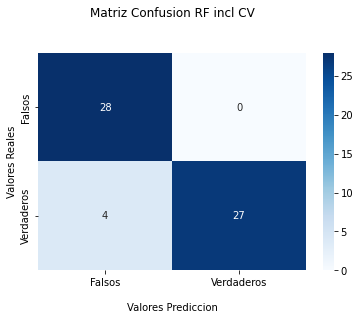

In [ ]:
ax = sns.heatmap(cm_CV_RF, annot=True, cmap='Blues')

ax.set_title('Matriz Confusion RF incl CV\n\n');
ax.set_xlabel('\nValores Prediccion')
ax.set_ylabel('Valores Reales');

# Etiquetas
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

plt.show()

In [ ]:
Exact_RF = (27+28)/(27+28+4)
Especif_RF = (28)/(28+0)
print("Exactitud:",Exact_RF)
print("Especificidad:",Especif_RF)

Exactitud: 0.9322033898305084
Especificidad: 1.0


Curva roc y auc

Sin Entrenamiento: ROC AUC=0.500
RF incl CV: ROC AUC=0.970


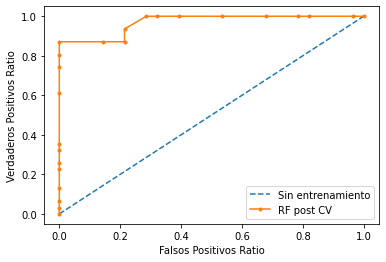

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# genero una prediccion sin entrenamiento (majority class)
ns_probs = [0 for _ in range(len(y_test))]

CV_RF_probs = model_CV_RF.predict_proba(X_test)
# mantengo solo los casos positivos
CV_RF_probs = CV_RF_probs[:, 1]

# calculo de resultados
ns_auc = roc_auc_score(y_test, ns_probs)
CV_RF_auc = roc_auc_score(y_test, CV_RF_probs)
# suma resultados
print('Sin Entrenamiento: ROC AUC=%.3f' % (ns_auc))
print('RF incl CV: ROC AUC=%.3f' % (CV_RF_auc))

# calculo curva roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_CV_fpr, rf_CV_tpr, _ = roc_curve(y_test, CV_RF_probs)

# plot de la curva roc para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenamiento')
plt.plot(rf_CV_fpr, rf_CV_tpr, marker='.', label='RF post CV')
# Etiquetas
plt.xlabel('Falsos Positivos Ratio')
plt.ylabel('Verdaderos Positivos Ratio')
# Leyendas
plt.legend()
# plot
plt.show()

Conclusión

Como resumen general de la clasificacion lograda por Random Forest: es muy alto el nivel de exactitud (93%) en la prediccion tanto de los locales rentables, como los no rentables. Adicionalmente es muy bajo el nivel de error tipo I en la prediccion de locales no rentables como rentables (Especificidad = 100%). Esto es muy positivo como performance del algoritmo, debido a que el negocio desea evitar la inversion en locales que no resulten finalmente rentables y no le es tan critico que algun local rentable pueda ser desconsiderado por el algoritmo. Esto significaria dejar pasar alguna buena ubicacion, pero es algo aceptable por el negocio. Siendo asi, dada la alta exactitud y especificidad del algoritmo de RF hiperparametrizado, resulta ser el algoritmo recomendado por el equipo de trabajo.

## Resolución: Modelo de Clasificación, Arboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo

Creamos un arbol de decisión sencillo y lo fiteamos

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_test_pred_tree = tree.predict(X_test) #Prediccion en Test
y_train_pred_tree = tree.predict(X_train) #Prediccion en Train

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
prediction_Tree_test = accuracy_score(y_test, y_test_pred_tree)

#Calculo el accuracy en Train
prediction_Tree_train = accuracy_score(y_train, y_train_pred_tree)

print('% de aciertos sobre el set de entrenamiento:', prediction_Tree_train.round(2))
print('% de aciertos sobre el set de evaluación:',prediction_Tree_test.round(2))

% de aciertos sobre el set de entrenamiento: 0.89
% de aciertos sobre el set de evaluación: 0.78


Matriz de Confusión: Arboles de Decisión

In [ ]:
cm_Tree = confusion_matrix(y_test,y_test_pred_tree)

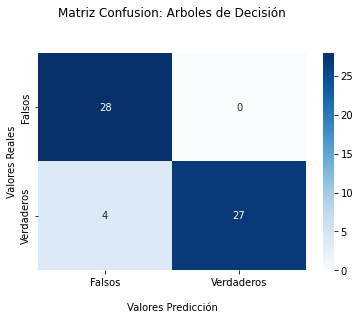

In [ ]:
ax = sns.heatmap(cm_CV_RF, annot=True, cmap='Blues')

ax.set_title('Matriz Confusion: Arboles de Decisión\n\n');
ax.set_xlabel('\nValores Predicción')
ax.set_ylabel('Valores Reales');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

## Display the visualization of the Confusion Matrix.
plt.show()

###Grid Search para Arboles de Decisión

In [ ]:
#Importamos librerias y el Dataset
import scipy as sp

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


In [ ]:
#Definicion de Hyperparámetros para Decision Tree
param_grid = {
              'criterion': ['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_features':['auto', 'sqrt', 'log2']
}
#Utilizamos la grilla definida anteriormente...
model_CV_tree = GridSearchCV(tree, param_grid=param_grid, cv=5)

In [ ]:
#Entrenamos nuestro modelo de Arboles de Decision con la grilla ya definida y CV con tamaño de Fold=5
model_CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
print("Mejores parametros: "+str(model_CV_tree.best_params_))
print("Mejor Score: "+str(model_CV_tree.best_score_.round(3))+'\n')

Mejores parametros: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
Mejor Score: 0.681



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model_CV_tree.cv_results_)
scores.round(3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005,0.002,0.003,0.001,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}",0.667,0.593,0.778,0.778,0.593,0.681,0.083,3
1,0.003,0.000,0.002,0.000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}",0.630,0.630,0.556,0.519,0.630,0.593,0.047,9
2,0.004,0.001,0.003,0.001,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}",0.667,0.593,0.778,0.778,0.593,0.681,0.083,3
3,0.003,0.000,0.002,0.000,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}",0.630,0.630,0.556,0.519,0.630,0.593,0.047,9
4,0.003,0.000,0.002,0.000,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}",0.519,0.593,0.630,0.556,0.630,0.585,0.043,11


In [ ]:
#Ahora sí ya estamos en condición de realizar nuestras predicciones

y_test_pred_CV_tree = model_CV_tree.predict(X_test) #Prediccion en Test
y_train_pred_CV_tree = model_CV_tree.predict(X_train) #Prediccion en Train

#Calculo el accuracy en Test
prediction_tree_CV_test = accuracy_score(y_test, y_test_pred_CV_tree).round(2)

#Calculo el accuracy en Train
prediction_tree_CV_train = accuracy_score(y_train, y_train_pred_CV_tree).round(2)

print('% de aciertos sobre el set de entrenamiento:', prediction_tree_CV_train)
print('% de aciertos sobre el set de evaluación:', prediction_tree_CV_test)

% de aciertos sobre el set de entrenamiento: 0.73
% de aciertos sobre el set de evaluación: 0.75


In [ ]:
from sklearn.metrics import classification_report
target_names = ['clase 0', 'clase 1']
print(classification_report(y_train, y_train_pred_CV_tree, target_names=target_names))

              precision    recall  f1-score   support

     clase 0       0.75      0.67      0.70        66
     clase 1       0.71      0.78      0.74        69

    accuracy                           0.73       135
   macro avg       0.73      0.72      0.72       135
weighted avg       0.73      0.73      0.72       135



Matriz de Confusión: Arboles de decisión con CV

In [ ]:
cm_CV_tree = confusion_matrix(y_test,y_test_pred_CV_tree)

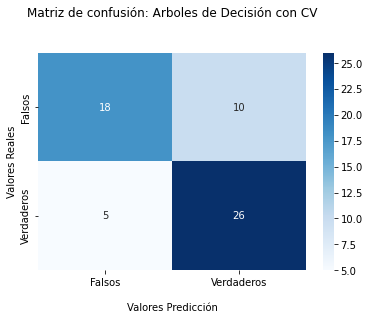

In [ ]:
ax = sns.heatmap(cm_CV_tree, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión: Arboles de Decisión con CV\n\n');
ax.set_xlabel('\nValores Predicción')
ax.set_ylabel('Valores Reales');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
Exact_Arb = (26+18)/(np.sum(cm_CV_tree))
Especif_Arb = (18)/(18+10)
print("Exactitud:",Exact_Arb)
print("Especificidad:",Especif_Arb)

Exactitud: 0.7457627118644068
Especificidad: 0.6428571428571429


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


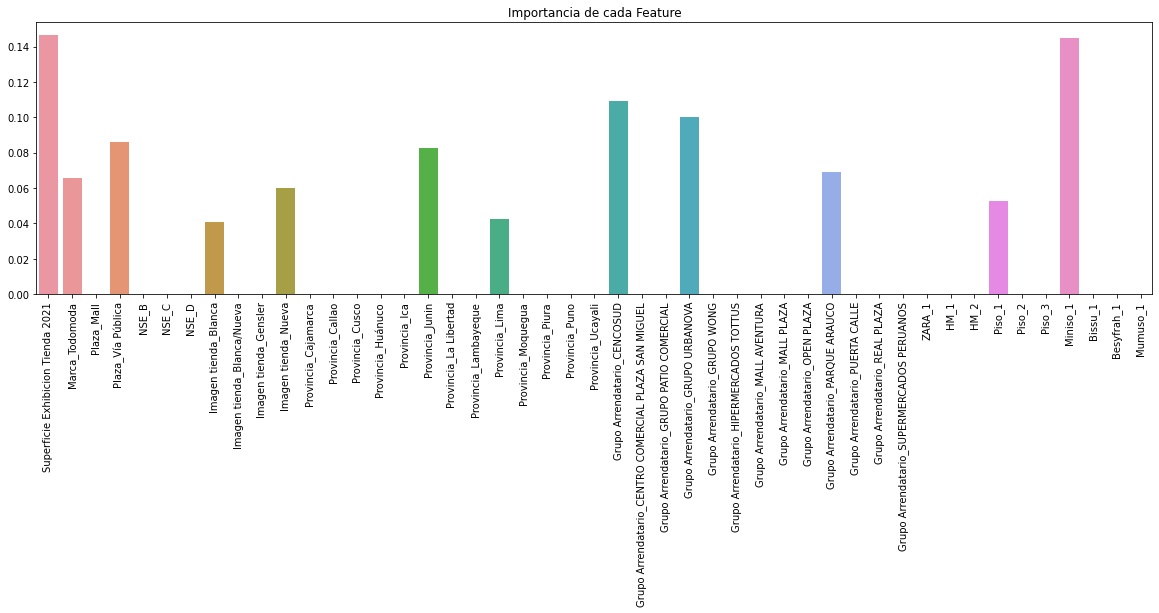

In [ ]:
import seaborn as sns
%matplotlib inline

importances = tree.feature_importances_
columns = X.columns
plt.figure(figsize=(20,5))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=90)
plt.show()

Conclusión Arboles de Decision

Como resumen general de la clasificacion lograda con arboles de decision, tras el CV, resulta una exactitud levemente menor a la evaluada inicialmente y solo alcanza 75%. La disminucion con CV podria deberse a la baja cantidad de datos disponibles. Por otro lado resulta sensiblemente mas baja la especificidad, 64%, en comparacion a RF, siendo que son mas los casos en donde se predicen valores falsos como positivos.

Utilizar este algoritmo de esta manera, podria llevar al negocio a decidir invertir reiteradamente en ubicaciones que finalmente no resulten rentables. Esto seria muy perjudicial para la compañía, por lo cual se desaconseja el uso del mismo.

## Resolución: Modelo de Clasificación, KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_test_pred_knn = knn.predict(X_test) #Prediccion en Test
y_train_pred_knn = knn.predict(X_train) #Prediccion en Train

#Calculo el accuracy en Test
prediction_knn_test = accuracy_score(y_test, y_test_pred_knn).round(2)

#Calculo el accuracy en Train
prediction_knn_train = accuracy_score(y_train, y_train_pred_knn).round(2)

print('% de aciertos sobre el set de entrenamiento:', prediction_knn_train)
print('% de aciertos sobre el set de evaluación:',prediction_knn_test)


% de aciertos sobre el set de entrenamiento: 0.87
% de aciertos sobre el set de evaluación: 0.71


Matriz de Confusión

In [ ]:
cm_KNN = confusion_matrix(y_test,y_test_pred_knn)

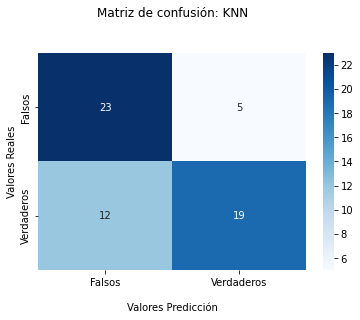

In [ ]:
ax = sns.heatmap(cm_KNN, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión: KNN\n\n');
ax.set_xlabel('\nValores Predicción')
ax.set_ylabel('Valores Reales');

# Etiquetas
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

# Visualización.
plt.show()

### Grid Search para KNN

In [ ]:
#Importamos librerias y el Dataset
import scipy as sp

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [ ]:
#Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'],
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

#Utilizamos la grilla definida anteriormente...
model_CV_KNN = GridSearchCV(knn, param_grid=param_grid, cv=5)

In [ ]:
#Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
model_CV_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Mejores parametros: "+str(model_CV_KNN.best_params_))
print("Mejor Score: "+str(model_CV_KNN.best_score_)+'\n')

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Mejor Score: 0.837037037037037



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model_CV_KNN.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003310,0.001099,0.003886,0.000428,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}",0.851852,0.777778,0.888889,0.888889,0.703704,0.822222,0.071817,21
1,0.002630,0.000023,0.002755,0.000063,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}",0.851852,0.777778,0.888889,0.888889,0.703704,0.822222,0.071817,21
2,0.002673,0.000109,0.003595,0.000016,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}",0.629630,0.592593,0.740741,0.666667,0.740741,0.674074,0.059259,113
3,0.002795,0.000177,0.002842,0.000131,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'weights': 'distance'}",0.777778,0.666667,0.925926,0.925926,0.740741,0.807407,0.103173,34
4,0.002809,0.000346,0.003857,0.000367,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}",0.740741,0.703704,0.814815,0.666667,0.777778,0.740741,0.052378,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.003666,0.001032,0.003417,0.000554,kd_tree,10,7,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}",0.777778,0.703704,0.777778,0.814815,0.851852,0.785185,0.049135,43
176,0.003150,0.000078,0.003981,0.000205,kd_tree,10,8,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}",0.666667,0.407407,0.555556,0.629630,0.703704,0.592593,0.104757,171
177,0.003677,0.001112,0.003224,0.000209,kd_tree,10,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'distance'}",0.777778,0.703704,0.777778,0.814815,0.777778,0.770370,0.036289,71
178,0.003158,0.000080,0.003936,0.000096,kd_tree,10,9,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'uniform'}",0.666667,0.370370,0.592593,0.629630,0.703704,0.592593,0.117121,171


In [ ]:
#Ahora sí ya estamos en condición de realizar nuestras predicciones
prediction_CV_KNN_test = model_CV_KNN.predict(X_test)
prediction_CV_KNN_train = model_CV_KNN.predict(X_train)

In [ ]:
#Calculo el accuracy en Train
print('% de aciertos sobre el set de entrenamiento:', accuracy_score(y_train, prediction_CV_KNN_train).round(2))

#Calculo el accuracy en Test
print('% de aciertos sobre el set de evaluación:', accuracy_score(y_test, prediction_CV_KNN_test).round(2))

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.9


In [ ]:
from sklearn.metrics import classification_report
target_names = ['clase 0', 'clase 1']
print(classification_report(y_train, prediction_CV_KNN_train, target_names=target_names))

              precision    recall  f1-score   support

     clase 0       1.00      1.00      1.00        66
     clase 1       1.00      1.00      1.00        69

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



Matriz de confusión: KNN con CV

In [ ]:
CM_CV_KNN = confusion_matrix(y_test, prediction_CV_KNN_test)

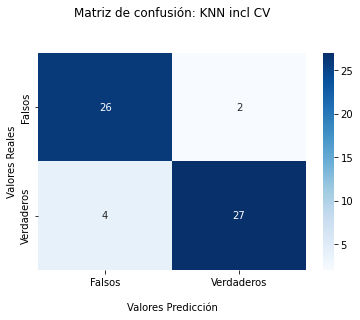

In [ ]:
ax = sns.heatmap(CM_CV_KNN, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión: KNN incl CV\n\n');
ax.set_xlabel('\nValores Predicción')
ax.set_ylabel('Valores Reales');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

# mostramos la matriz.
plt.show()

In [ ]:
Exact_KNN = (27+26)/(np.sum(CM_CV_KNN))
Especif_KNN = (26)/(26+2)
print("Exactitud:",Exact_KNN)
print("Especificidad:",Especif_KNN)


Exactitud: 0.8983050847457628
Especificidad: 0.9285714285714286


Conclusion KNN:

Si bien la exactitud del algoritmo es muy buena logrando 89%, la especificidad (93%) no es tan alta como en el caso de RF. Esto no es recomendable porque pudiese orientar al negocio a invertir en ciertas ubicaciones que finalmente no resulten rentables. Siendo que el objetivo de la herramienta es justamente evitar errores en seleccionar ubicaciones no rentables, este algoritmo no es el mas recomendable, si bien quedara en el segundo lugar.

## Resolución: Modelo de Clasificacion, XGBoost

In [ ]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
variables = X.columns
var = pd.DataFrame(data = variables, columns = ["Var_text"])
#var

In [ ]:
# importamos las librerias

from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

# Ajustamos en modelo
xgb_cl.fit(X_train, y_train)



XGBClassifier()

In [ ]:
y_test_pred_xgb = xgb_cl.predict(X_test) #Predicción en Test
y_train_pred_xgb = xgb_cl.predict(X_train) #Predicción en Train

#Calculo el accuracy en Test
precision_xgb_test = accuracy_score(y_test, y_test_pred_xgb).round(2)

#Calculo el accuracy en Train
precision_xgb_train = accuracy_score(y_train, y_train_pred_xgb).round(2)

print('% de aciertos sobre el set de entrenamiento:', precision_xgb_train)
print('% de aciertos sobre el set de evaluación:', precision_xgb_test)

% de aciertos sobre el set de entrenamiento: 0.96
% de aciertos sobre el set de evaluación: 0.81


### Grid Search para XGBoost

In [ ]:
#Definicion de Hyperparámetros para XGboost

param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#Utilizamos la grilla definida anteriormente...
model_CV_xgb = GridSearchCV(xgb_cl, param_grid=param_grid, cv=5)

In [ ]:
#Entrenamos nuestro modelo de XGBoost con la grilla ya definida y CV con tamaño de Fold=5
model_CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [ ]:
print("Mejores parametros: "+str(model_CV_xgb.best_params_))
print("Mejor Score: "+str(model_CV_xgb.best_score_)+'\n')

Mejores parametros: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
Mejor Score: 0.7777777777777778



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model_CV_xgb.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025947,0.001868,0.002394,0.000258,0.6,0.5,3,1,0.6,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}",0.925926,0.703704,0.629630,0.777778,0.592593,0.725926,0.118519,45
1,0.025171,0.003147,0.002853,0.001144,0.6,0.5,3,1,0.8,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}",0.814815,0.740741,0.666667,0.814815,0.629630,0.733333,0.075541,37
2,0.024240,0.003504,0.002532,0.000575,0.6,0.5,3,1,1.0,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}",0.851852,0.703704,0.740741,0.777778,0.629630,0.740741,0.074074,24
3,0.021969,0.003145,0.002432,0.000430,0.6,0.5,3,5,0.6,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}",0.703704,0.555556,0.555556,0.592593,0.444444,0.570370,0.083148,256
4,0.025461,0.003991,0.002533,0.000270,0.6,0.5,3,5,0.8,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}",0.703704,0.629630,0.592593,0.592593,0.629630,0.629630,0.040572,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.029088,0.001714,0.002202,0.000025,1.0,5,5,5,0.8,"{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}",0.629630,0.629630,0.592593,0.518519,0.666667,0.607407,0.050239,208
401,0.030348,0.002703,0.002175,0.000038,1.0,5,5,5,1.0,"{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}",0.703704,0.629630,0.629630,0.518519,0.592593,0.614815,0.060178,196
402,0.017498,0.000343,0.002130,0.000024,1.0,5,5,10,0.6,"{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.6}",0.481481,0.481481,0.481481,0.518519,0.481481,0.488889,0.014815,289
403,0.021019,0.000142,0.002198,0.000082,1.0,5,5,10,0.8,"{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}",0.481481,0.481481,0.481481,0.370370,0.481481,0.459259,0.044444,346


In [ ]:
#Ahora sí ya estamos en condición de realizar nuestras predicciones con CV
y_test_pred_CV_xgb = model_CV_xgb.predict(X_test)
y_train_pred_CV_xgb = model_CV_xgb.predict(X_train)

In [ ]:
#Calculo el accuracy en Test
precision_CV_xgb_test = accuracy_score(y_test, y_test_pred_CV_xgb).round(2)

#Calculo el accuracy en Train
precision_CV_xgb_train = accuracy_score(y_train, y_train_pred_CV_xgb).round(2)

print('% de aciertos sobre el set de entrenamiento:', precision_CV_xgb_train )
print('% de aciertos sobre el set de evaluación:',precision_CV_xgb_test)

#Accuracy
print('Exactitud:', accuracy_score(y_test, y_test_pred_CV_xgb).round(3))

% de aciertos sobre el set de entrenamiento: 0.98
% de aciertos sobre el set de evaluación: 0.85
Exactitud: 0.847


In [ ]:
from sklearn.metrics import classification_report
target_names = ['clase 0', 'clase 1']
print(classification_report(y_train, y_train_pred_CV_xgb, target_names=target_names))

              precision    recall  f1-score   support

     clase 0       1.00      0.95      0.98        66
     clase 1       0.96      1.00      0.98        69

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



Matriz de Confusión: XG-Boost con CV

In [ ]:
CM_CV_XGB = confusion_matrix(y_test, y_test_pred_CV_xgb)

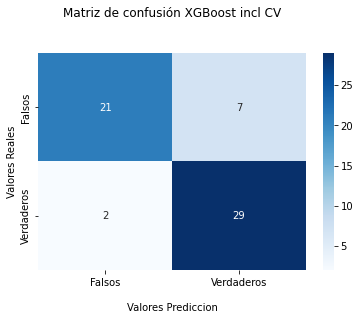

In [ ]:
ax = sns.heatmap(CM_CV_XGB, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión XGBoost incl CV\n\n');
ax.set_xlabel('\nValores Prediccion')
ax.set_ylabel('Valores Reales');

# Etiquetas
ax.xaxis.set_ticklabels(['Falsos','Verdaderos'])
ax.yaxis.set_ticklabels(['Falsos','Verdaderos'])

## Mostramos la matriz.
plt.show()

In [ ]:
Exact_XGB = (29+21)/(np.sum(CM_CV_XGB))
Especif_XGB = (21)/(21+7)
print("Exactitud:",Exact_XGB)
print("Especificidad:",Especif_XGB)

Exactitud: 0.847457627118644
Especificidad: 0.75


Conclusion XGBoost

El algoritmo de clasificasion XGBoost logro una alta exactitud (85%) sin alcanzar a RF. Adicionalmente su especificidad no ha sido alta, dado que ha propuesto 7 locales no rentables como rentables (erro 1). Es por este motivo que no hemos recomendando este algoritmo, el cual quedara en el tercer lugar entre todos los anteriormente analizados.

# **Conclusiones Finales del Trabajo**

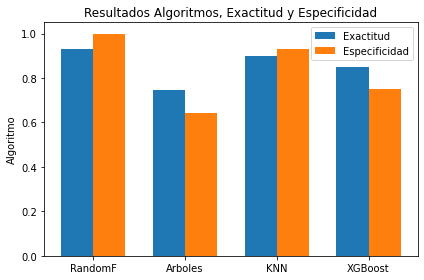

In [ ]:
Algoritmo = ['RandomF', 'Arboles', 'KNN', 'XGBoost']
Exactitud = [Exact_RF, Exact_Arb, Exact_KNN, Exact_XGB]
Especificidad = [Especif_RF, Especif_Arb, Especif_KNN, Especif_XGB]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Algoritmo))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de Exactitud
rects1 = ax.bar(x - width/2, Exactitud, width, label='Exactitud')
#Generamos las barras para el conjunto de Especificidad
rects2 = ax.bar(x + width/2, Especificidad, width, label='Especificidad')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Algoritmo')
ax.set_title('Resultados Algoritmos, Exactitud y Especificidad')
ax.set_xticks(x)
ax.set_xticklabels(Algoritmo)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()


fig.tight_layout()
plt.savefig('resultados algoritmos.png')
#Mostramos la grafica con el metodo show()
plt.show()


Los clasificadores de Random Forest, KNN y XGBoost superaron a Arboles de Decisión tras la mejora en los hyperparametros. La exactitud mas alta lograda ha sido de los 93% con RF.

Adicionalmente el Algoritmo de RF ha logrado la mayor especificidad (100%), es decir detectar todas las ubicaciones no rentables. Siendo que esto era uno de los objetivos solicitados por la compañía para evitar futuras inversiones no convenientes, hemos decidido a este, como el mejor algoritmo para cumplir este desafio.

Esto significa que conociendo las principales informaciones de la ubicación donde se establecera un potencial nuevo local, podemos predecir el éxito de la inversión con más de 90% de exactitud y dada la alta especifidad, minimizar el riesgo de inversion en plazas no rentables.

# Linea de Trabajo evolutiva (post Coder House)

Dado que hemos podido identificar al menos dos algoritmos (RF y XGBoost) que permiten predecir con gran exactitud y alta especificidad, si una ubicacion cumplira con la expectativa de rentabilidad o no, continuaremos a futuro desarrollando la alternativa de predecir la venta de la potencial ubicacion en forma de regresion, para que con este dato luego sea factible dimensionar con mayor claridad cual seria su valor maximo aceptable de alquiler a pagar (15% de la venta, segun informacion de la empresa). Esto seria de gran valor para una futura negociacion previo a la toma de decision final sobre la viabilidad de la plaza.

Elegimos los datos que queremos predecir en forma de regresion


In [ ]:
# Utilizaremos las mismas variables previamente utilizadas, dado que las mismas constituyen los datos de conocimiento previo al alquiler de una nueva ubicacion.
Xini = data_cf[['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso','Superficie Exhibicion Tienda 2021']]

# Definimos la variable de respuesta, que en este caso sera el dato de ventas. Lo dividiremos x2 dado que es el acumulado de dos meses y queremos estimar venta mensual:
y = data['Venta Importe Bruto 2021']/2

#transformaremos las variables predictoras categoricas, para poder utilizarlas en la matriz. Se utiliza dropfirst=True para evitar columnas dummies que generen multicolinealidad

X = pd.get_dummies(Xini, drop_first=True, prefix = ['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso'], columns= ['Marca','Plaza','NSE','Imagen tienda','Provincia','Grupo Arrendatario','ZARA', 'HM',
       'Piso', 'Miniso', 'Bissu', 'Besyfrah', 'Mumuso'])
X


,Superficie Exhibicion Tienda 2021,Marca_Todomoda,Plaza_Mall,Plaza_Vía Pública,NSE_B,NSE_C,NSE_D,Imagen tienda_Blanca,Imagen tienda_Blanca/Nueva,Imagen tienda_Gensler,...,ZARA_1,HM_1,HM_2,Piso_1,Piso_2,Piso_3,Miniso_1,Bissu_1,Besyfrah_1,Mumuso_1
0,28,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,32,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,36,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,32,1,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,43,1,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,45,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
258,18,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
260,29,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,1,1,1
268,26,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,0


Separaremos los datos de entrenamiento y evaluacion (train y test)

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train  #al tener pocos datos utilizaremos un test que no sea tan pequeno y lo definimos en 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Carga de las librerías
import urllib.request
from sklearn.ensemble import RandomForestRegressor

Creamos un random forest regressor

In [ ]:
RFRmodel = RandomForestRegressor(random_state=11, n_estimators=20, max_features="log2")
RFRmodel.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=20, random_state=11)

In [ ]:
y_test_pred_RFR = RFRmodel.predict(X_test) #Prediccion en Test
y_train_pred_RFR = RFRmodel.predict(X_train) #Prediccion en Train

Aplicamos un Grid Search

In [ ]:
#Definicion de Hyperparámetros para Random Forest
param_grid = {
    "n_estimators":[100,200,500], #agregamos un estimador alto para verificar si mejora
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}
#Utilizamos la grilla definida anteriormente...
model_CV_RFR = GridSearchCV(RFRmodel, param_grid=param_grid, cv=5)

In [ ]:
#Entrenamos nuestro modelo de RFR con la grilla ya definida y CV con tamaño de Fold=5
model_CV_RFR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='log2',
                                             n_estimators=20, random_state=11),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 500]})

In [ ]:
print("Mejores parametros: "+str(model_CV_RFR.best_params_))
print("Mejor Score: "+str(model_CV_RFR.best_score_.round(3))+'\n')

Mejores parametros: {'max_depth': 10, 'max_features': 16, 'n_estimators': 100}
Mejor Score: 0.557



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model_CV_RFR.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141651,0.010888,0.015876,0.002077,10,6,100,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 100}",0.812088,0.232951,0.569927,0.646317,0.486308,0.549518,0.191280,8
1,0.282481,0.009887,0.024403,0.001012,10,6,200,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 200}",0.814536,0.236160,0.570862,0.622749,0.480010,0.544864,0.189192,23
2,0.675899,0.006384,0.064132,0.006768,10,6,500,"{'max_depth': 10, 'max_features': 6, 'n_estimators': 500}",0.814602,0.233733,0.536503,0.611876,0.451322,0.529607,0.190635,47
3,0.141274,0.012787,0.014535,0.001345,10,8,100,"{'max_depth': 10, 'max_features': 8, 'n_estimators': 100}",0.822063,0.178710,0.607497,0.614755,0.431574,0.530920,0.215210,45
4,0.279064,0.002186,0.028988,0.005096,10,8,200,"{'max_depth': 10, 'max_features': 8, 'n_estimators': 200}",0.819640,0.229301,0.578331,0.616410,0.461934,0.541123,0.193973,31


In [ ]:
#Ahora sí ya estamos en condición de realizar nuestras predicciones con CV

y_test_pred_CV_RFR = model_CV_RFR.predict(X_test) #Prediccion en Test
y_train_pred_CV_RFR = model_CV_RFR.predict(X_train) #Prediccion en Train

In [ ]:
#Convertimos en df la salida
df_RFR = pd.DataFrame({'Actual': y_test.round(1), 'Predicted': y_test_pred_RFR.round(1), 'Desvio%': ((y_test_pred_RFR.round(1)-y_test.round(1))/y_test.round(1)*100).round(1), 'Predicted CV': y_test_pred_CV_RFR.round(1), 'Desvio% CV': ((y_test_pred_CV_RFR.round(1)-y_test.round(1))/y_test.round(1)*100).round(1)})
df_RFR

,Actual,Predicted,Desvio%,Predicted CV,Desvio% CV
178,68861.2,68864.9,0.0,69176.5,0.5
16,109508.8,108643.3,-0.8,124482.6,13.7
195,50376.2,57679.5,14.5,61748.6,22.6
136,19373.4,38573.2,99.1,45566.5,135.2
68,59180.2,71405.9,20.7,72868.6,23.1
193,105967.5,70535.2,-33.4,62484.3,-41.0
55,68497.0,81096.4,18.4,83723.8,22.2
15,90576.4,68264.2,-24.6,56594.3,-37.5
152,90576.4,68264.2,-24.6,56594.3,-37.5
151,101197.2,84842.4,-16.2,77206.2,-23.7


### Metricas de resultados sin CV

In [ ]:
from sklearn import metrics
print('Mean Absolute Ventas:', np.mean(y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_RFR).round())
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_RFR ).round())
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_RFR )).round())


Mean Absolute Ventas: 75182.29186610176
Mean Absolute Error: 9933.0
Mean Squared Error: 173957586.0
Root Mean Squared Error: 13189.0


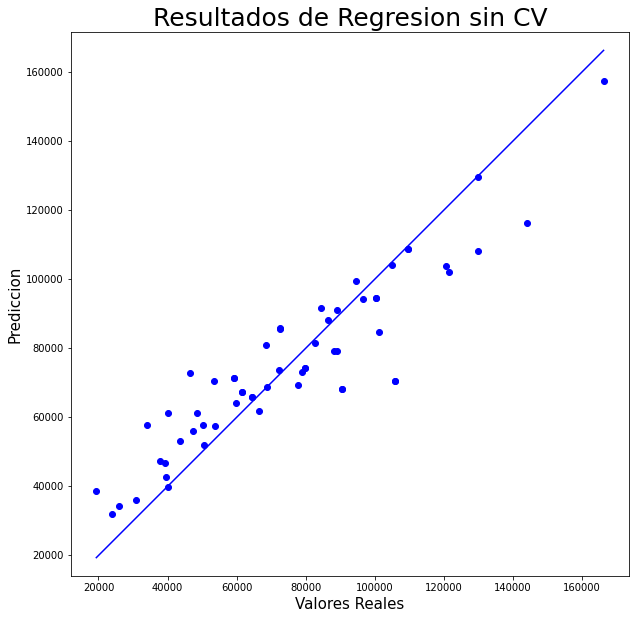

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred_RFR, c='blue')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_test_pred_RFR), max(y_test))
p2 = min(min(y_test_pred_RFR), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Resultados de Regresion sin CV', fontsize=25)
plt.xlabel('Valores Reales', fontsize=15)
plt.ylabel('Prediccion', fontsize=15)
plt.axis('equal')
plt.show()

### Metricas de resultados con CV

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_CV_RFR).round())
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_CV_RFR ).round())
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_CV_RFR )).round())

Mean Absolute Error: 12991.0
Mean Squared Error: 269157065.0
Root Mean Squared Error: 16406.0


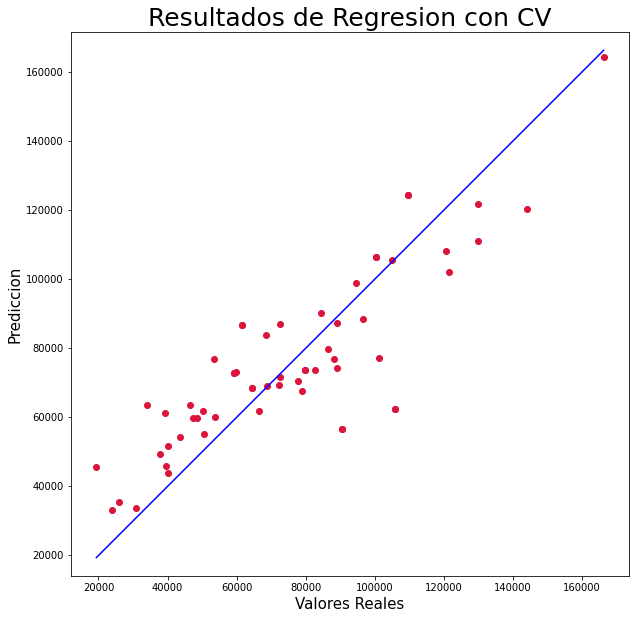

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred_CV_RFR, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_test_pred_CV_RFR), max(y_test))
p2 = min(min(y_test_pred_CV_RFR), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Resultados de Regresion con CV', fontsize=25)
plt.xlabel('Valores Reales', fontsize=15)
plt.ylabel('Prediccion', fontsize=15)
plt.axis('equal')
plt.show()

## Conclusiones preliminares sobre la regresion utilizando RF con CV:
El algoritmo logrado tiende a predecir un nivel de venta mayor al real en locales de baja facturacion (>70000), mientras que en locales de alta facturacion tiende a estimar valores mas bajos de los finalmente alcanzados.

Esto nos llevaria a tener mayor riesgo en decision de locales de baja venta, mientras que ubicaciones con caracteristicas buenas para ubicar un local, nos estaria reduciendo el riesgo de invertir en plazas no convenientes, y asociado a esto, potencialmente desalentando la inversion en plazas potencialmente interesantes. En base al objetivo inicialmente planteado del proyecto, esta situacion seria aceptable para el negocio y continuaremos trabajando para mejorar la prediccion de la venta con mas pruebas y algoritmo en el futuro.

## Utilizacion de los Algoritmos Desarrollados para evaluar la conveniencia de Seleccion de un Nueva Locacion

Predeciremos entonces con el algoritmo seleccionado de clasificacion, si la ubicacion sera rentable o no. A continuacion su nivel de venta y por ultimo el valor de alquiler maximo aceptable para negociar:

In [ ]:
## Cargamos la info sobre la nueva ubicacion, para poder usarla en el modelo entrenado:

X_Nueva_tienda = pd.DataFrame(columns=['Superficie Exhibicion Tienda 2021', 'Marca_Todomoda', 'Plaza_Mall',
       'Plaza_Vía Pública', 'NSE_B', 'NSE_C', 'NSE_D', 'Imagen tienda_Blanca',
       'Imagen tienda_Blanca/Nueva', 'Imagen tienda_Gensler',
       'Imagen tienda_Nueva', 'Provincia_Cajamarca', 'Provincia_Callao',
       'Provincia_Cusco', 'Provincia_Huánuco', 'Provincia_Ica',
       'Provincia_Junin', 'Provincia_La Libertad', 'Provincia_Lambayeque',
       'Provincia_Lima', 'Provincia_Moquegua', 'Provincia_Piura',
       'Provincia_Puno', 'Provincia_Ucayali', 'Grupo Arrendatario_CENCOSUD',
       'Grupo Arrendatario_CENTRO COMERCIAL PLAZA SAN MIGUEL',
       'Grupo Arrendatario_GRUPO PATIO COMERCIAL',
       'Grupo Arrendatario_GRUPO URBANOVA', 'Grupo Arrendatario_GRUPO WONG',
       'Grupo Arrendatario_HIPERMERCADOS TOTTUS',
       'Grupo Arrendatario_MALL AVENTURA', 'Grupo Arrendatario_MALL PLAZA',
       'Grupo Arrendatario_OPEN PLAZA', 'Grupo Arrendatario_PARQUE ARAUCO',
       'Grupo Arrendatario_PUERTA CALLE', 'Grupo Arrendatario_REAL PLAZA',
       'Grupo Arrendatario_SUPERMERCADOS PERUANOS', 'ZARA_1', 'HM_1', 'HM_2',
       'Piso_1', 'Piso_2', 'Piso_3', 'Miniso_1', 'Bissu_1', 'Besyfrah_1',
       'Mumuso_1'])

X_NT = X_Nueva_tienda.append({'Superficie Exhibicion Tienda 2021':40, 'Marca_Todomoda':1, 'Plaza_Mall':1,
       'Plaza_Vía Pública':0, 'NSE_B':1, 'NSE_C':0, 'NSE_D':0, 'Imagen tienda_Blanca':0,
       'Imagen tienda_Blanca/Nueva':0, 'Imagen tienda_Gensler':1,
       'Imagen tienda_Nueva':0, 'Provincia_Cajamarca':0, 'Provincia_Callao':0,
       'Provincia_Cusco':0, 'Provincia_Huánuco':0, 'Provincia_Ica':0,
       'Provincia_Junin':0, 'Provincia_La Libertad':0, 'Provincia_Lambayeque':1,
       'Provincia_Lima':0, 'Provincia_Moquegua':0, 'Provincia_Piura':0,
       'Provincia_Puno':0, 'Provincia_Ucayali':0, 'Grupo Arrendatario_CENCOSUD':0,
       'Grupo Arrendatario_CENTRO COMERCIAL PLAZA SAN MIGUEL':0,
       'Grupo Arrendatario_GRUPO PATIO COMERCIAL':0,
       'Grupo Arrendatario_GRUPO URBANOVA':0, 'Grupo Arrendatario_GRUPO WONG':0,
       'Grupo Arrendatario_HIPERMERCADOS TOTTUS':0,
       'Grupo Arrendatario_MALL AVENTURA':0, 'Grupo Arrendatario_MALL PLAZA':0,
       'Grupo Arrendatario_OPEN PLAZA':0, 'Grupo Arrendatario_PARQUE ARAUCO':0,
       'Grupo Arrendatario_PUERTA CALLE':0, 'Grupo Arrendatario_REAL PLAZA':0,
       'Grupo Arrendatario_SUPERMERCADOS PERUANOS':1, 'ZARA_1':0, 'HM_1':0, 'HM_2':0,
       'Piso_1':1, 'Piso_2':0, 'Piso_3':0, 'Miniso_1':0, 'Bissu_1':0, 'Besyfrah_1':0,
       'Mumuso_1':0}, ignore_index=True)

X_NT


,Superficie Exhibicion Tienda 2021,Marca_Todomoda,Plaza_Mall,Plaza_Vía Pública,NSE_B,NSE_C,NSE_D,Imagen tienda_Blanca,Imagen tienda_Blanca/Nueva,Imagen tienda_Gensler,...,ZARA_1,HM_1,HM_2,Piso_1,Piso_2,Piso_3,Miniso_1,Bissu_1,Besyfrah_1,Mumuso_1
0,40,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
if model_CV_RF.predict(X_NT) > 0:
  print('Se predice que la nueva locacion en evaluacion sera Rentable')
  print('La estimacion de Venta para la nueva Ubicacion es de:', (model_CV_RFR.predict(X_NT)).round(1))
  #Finalmente calcularemos el alquiler maximo aceptable por el negocio, en base al valor estimado de ventas:
  limAlquiler_porcent = 0.15
  print('El Alquiler maximo aceptable para esta ubicacion se estima en:', (model_CV_RFR.predict(X_NT)*limAlquiler_porcent).round(1))

else:
  print('Se predice que la ubicacion NO sera Rentable:')

Se predice que la nueva locacion en evaluacion sera Rentable
La estimacion de Venta para la nueva Ubicacion es de: [84644.3]
El Alquiler maximo aceptable para esta ubicacion se estima en: [12696.6]
